In [ ]:
# 구버전
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:97% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

In [ ]:
# 새버전
from IPython.display import display, HTML
display(HTML("""
<style>
div.jp-WindowedPanel-outer.lm-Widget{padding:5px;}
div.lm-Widget{font-size:12pt;}
div.cm-content {font-family:Consolas; font-size:12pt;}
div.jp-OutputArea-output pre {font-size:12pt; font-weight:bold;}
input.jp-Stdin-input {font-family:Consolas; font-size:12pt;}
</style>
"""))

# 전국 신규 민간아파트 분양가격 동향 분석
* 2015부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까?
* 공공데이터를 활용하여 데이터를 판다스 데이터프레임으로 가져와 전처리하고 요약한다
* 수치형 데이터와 범주형 데이터 다루기
* 데이터 형식에 따른 다양한 시각화 방법을 실습한다

## 다운로드
- https://www.data.go.kr에서 "아파트 분양 가격 동향"을 검색한 후, 자료를 다운받는다

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 라이브러리 로드
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # 결측치(" " 스페이스) np.nan

# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

#한글 폰트 설정
plt.rc("font", family="Malgun Gothic") # windows
# plt.rc('font', family='AppleGothic') # Mac
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

# 2. 데이터 로드

In [4]:
! dir data # ! cmd에 사용할 수 있는 명령어

 C 드라이브의 볼륨에는 이름이 없습니다.

파일을 찾을 수 없습니다.



 볼륨 일련 번호: 82E2-A836

 C:\Programming_C_Python\source\Python\data 디렉터리

2024-06-03  오후 02:42    <DIR>          .
2024-06-03  오후 02:42    <DIR>          ..
2024-06-03  오전 11:35    <DIR>          .ipynb_checkpoints
2024-06-03  오전 09:19                58 ch08.txt
2024-06-03  오전 11:11                18 ch09.txt
2024-06-03  오후 12:49               291 ch09_member1.csv
2024-06-03  오후 12:49               315 ch09_member2.csv
2024-06-03  오전 09:02               284 ch10_member1.json
2024-06-03  오전 09:02               299 ch10_member2.json
2024-06-03  오전 11:34               462 member.csv
2024-06-03  오후 02:41                 0 시리즈문자 함수를 씌기 위한 URL.txt
2024-06-03  오전 09:02             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-06-03  오전 09:02           358,739 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20230630.csv
              10개 파일             362,629 바이트

 C:\Programming_C_Python\source\Python 디렉터리


 C:\Programming_C_Python\source\Python 디렉터리


 C:\Programming_C_Python\source\Python 디렉터리


 C:\Pr

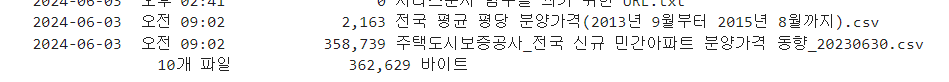
- 주택도시보증공사_전국 신규 민간아파트 분양가격 동향 File ⇒ 제곱미터 당 분양가격

## ① 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [13]:
# df_first
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding="cp949")
df_first.shape

(17, 22)

In [15]:
# df_first 한줄 출력
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [9]:
# 출력가능한 최대 컬럼수 출력
pd.options.display.max_columns

20

In [ ]:
# df_first의 모든 열이 나오도록 출력 가능한 최대 컬럼수 조정후 확인
pd.options.display.max_columns = df_first.shape[1] # shape(); 행과 열을 갖는 튜플

In [ ]:
# df_first 마지막 1줄 출력
df_first.tail(1)

In [12]:
# df_first 열별 데이터 갯수 및 타입 및 메모리 정보
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [16]:
# 지역 컬럼을 index로 하여
df_first_temp = df_first.set_index('지역')
df_first_temp.sample()

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
충남,6365,6365,6379,6287,6552,6591,6644,6805,6914,6882,...,6940,6989,6976,6980,7161,7017,6975,6939,6935,6942


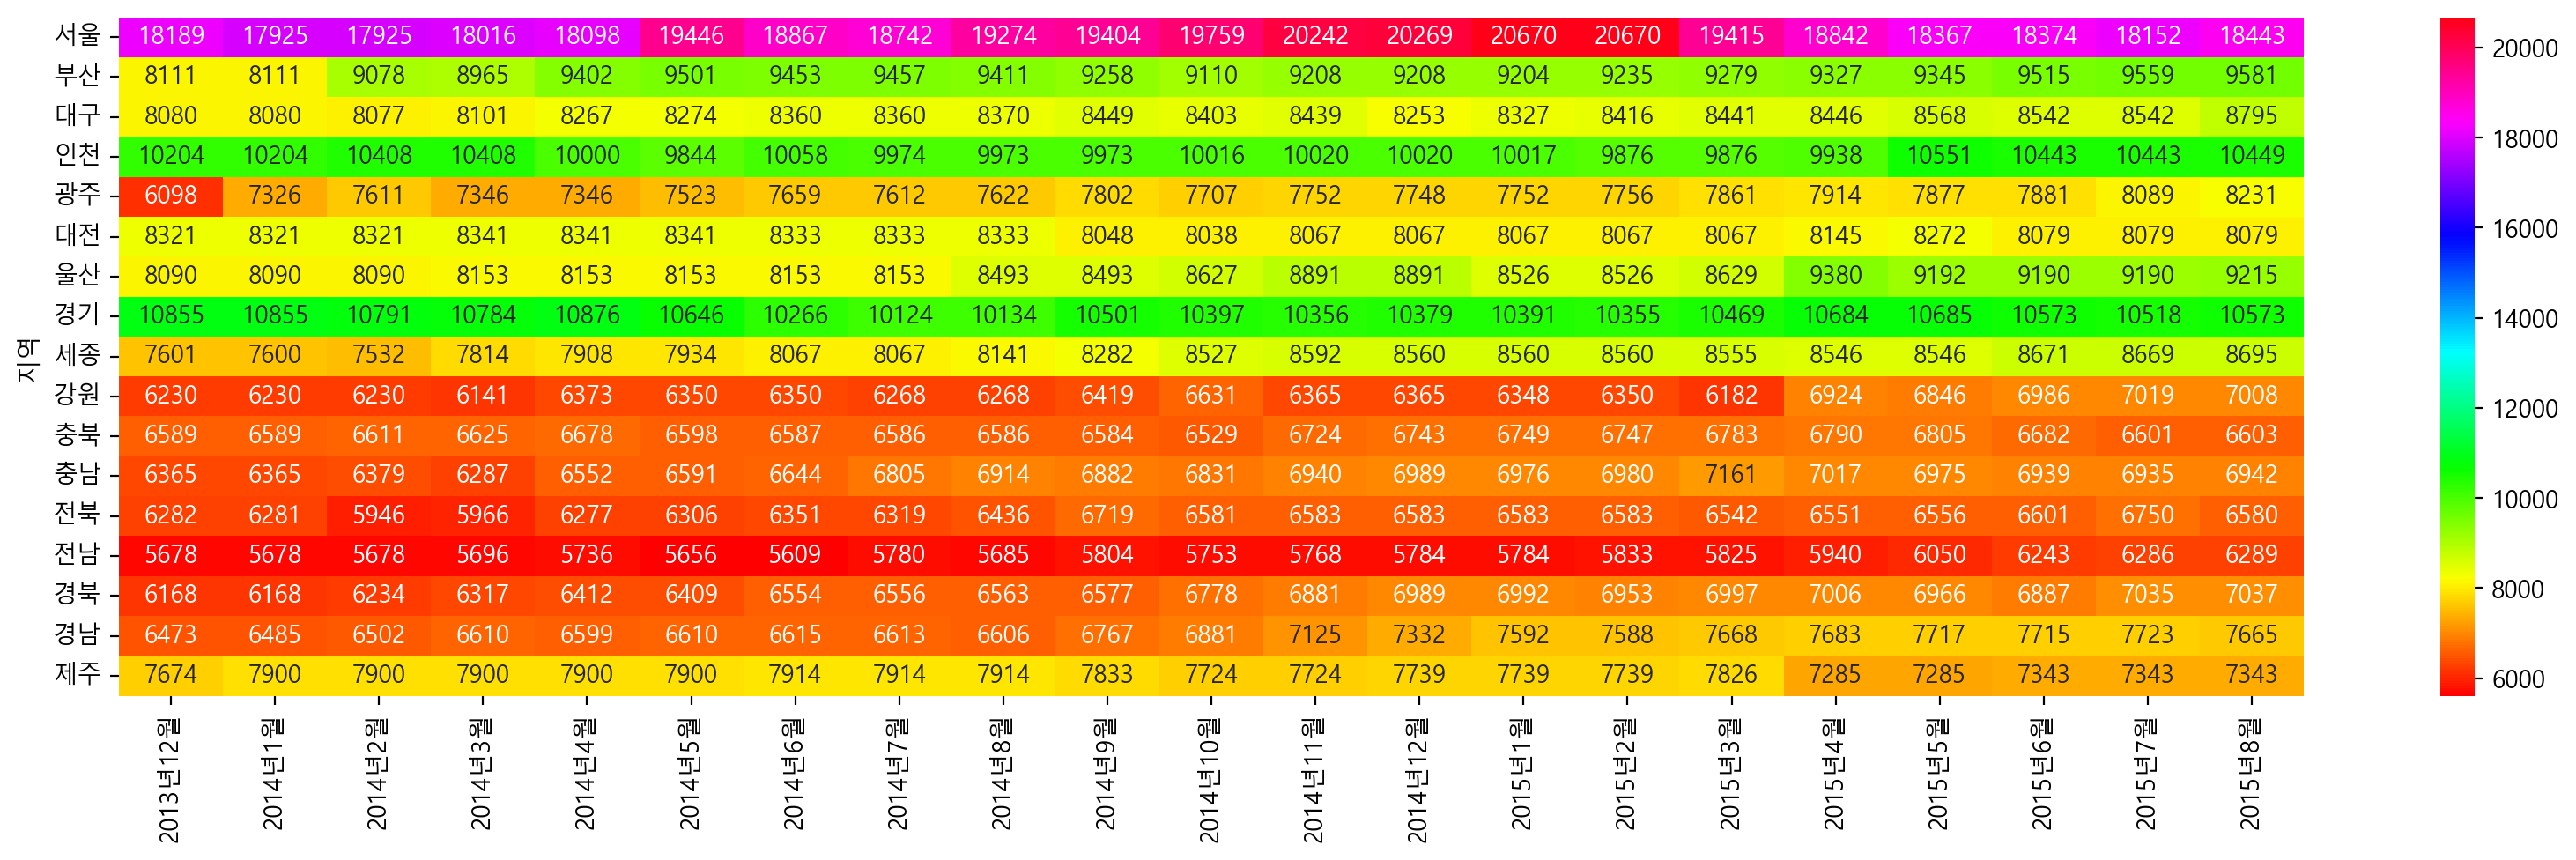

In [26]:
# heatmap 으로 부동산 가격을 시각화한다
plt.figure(figsize=(20,5))
sns.heatmap(df_first_temp, annot=True, cmap='hsv', fmt='d') #heat맵 색 바꾸기 -> cmap / annotation 알아보기 어려움 -> fmt='d'
plt.show()

구간별 색 차이가 크지 않음 ⇒ 색깔 맵 지정할 수 있는 링크: https://matplotlib.org/stable/users/explain/colors/colormaps.html<br>
**<기존의 heatmap>**
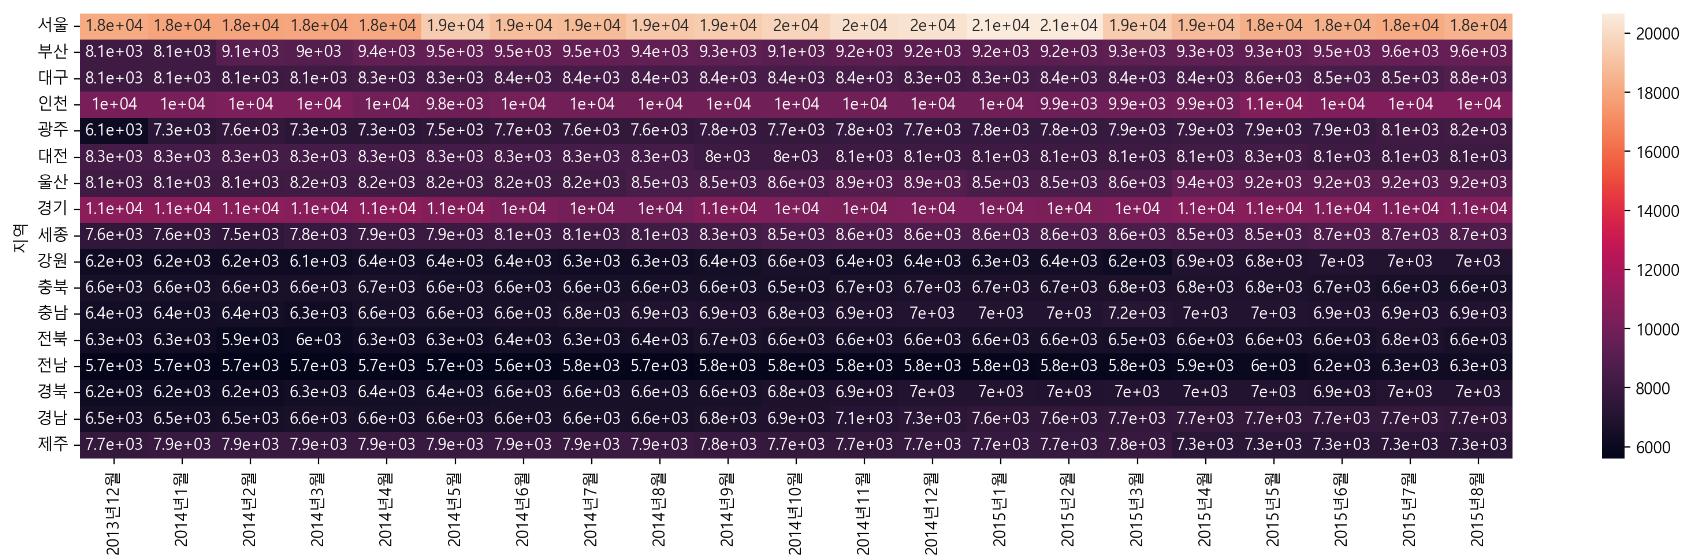

## ② 이후 데이터는 df_last 변수에 담아 탐색

In [29]:
# df_last
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20230630.csv',
                      encoding='cp949')
df_last.shape

(7905, 5)

In [28]:
# head로 파일을 5개만 미리보기합니다
df_last.head(5)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [33]:
# tail로도 미리보기 합니다.
df_last.tail(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
7903,제주,전용면적 85제곱미터초과 102제곱미터이하,2023,6,6639
7904,제주,전용면적 102제곱미터초과,2023,6,7506


In [31]:
# 데이터 요약하기(결측치가 있음) #분양가격(제곱미터)는 문자를 수치형으로 변경하여야 평당분양가격 계산 가능
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         7905 non-null   object
 1   규모구분        7905 non-null   object
 2   연도          7905 non-null   int64 
 3   월           7905 non-null   int64 
 4   분양가격(제곱미터)  7358 non-null   object
dtypes: int64(2), object(3)
memory usage: 308.9+ KB


전체 데이터 7905개<br>
분양가격(제곱미터) 7358개<br>
결측치 547개 ⇒ 넘 많음!<br>
<br>
분양가격(제곱미터) object = int만 들어있지 않다 (float(결측치 포함), ...)

# 3.df_last의 데이터 결측치를 확인하고 대체할지 고민한다

In [36]:
df_last.isna().sum() # 결측치 여부 True(1), False(0)
# axis=0 → 행을 쫙 더해줌(지역명, 규모구분, 연도, 월 → 0, 결측치 없음)

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    547
dtype: int64

# 4. df데이터셋에 분양가격(제곱미터) 데이터의 타입변경 후 평당분양가격 추가

In [38]:
# 분양가격(제곱미터) 컬럼이 문자형이라 수치형으로 변경한 후 평당분양가격 추가
df_last.loc[0, '분양가격(제곱미터)'], type(df_last.loc[0, '분양가격(제곱미터)'])

('5841', str)

In [41]:
# 오류남
#df_last['분양가격(제곱미터)'].astype('int64')

In [43]:
# 결측치가 있는 곳 출력하기 df_last[조건]
#df_last[df_last['분양가격(제곱미터)']==np.nan] → 결측치는 ==으로 찾는거 아님
df_last[df_last['분양가격(제곱미터)'].isna()].head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN


In [44]:
# 기본적으로 '분양가격(제곱미터)' 컬럼은 str이지만 결측치가 있는 곳은 float로 나옴
type(df_last.loc[368, '분양가격(제곱미터)'])

float

In [ ]:
# df_last['분양가격(제곱미터)'].astype('float64') #특정열 데이터타입변경 에러 이유 : ' ' 땜시
#df_last['분양가격(제곱미터)'].astype('float64')

In [47]:
# df['월'].astype('int64')에러 나는 이유는 ?
#df_last['월'].astype('int64')

In [52]:
# 분양가격(제곱미터)컬럼이 공백이나 space인 행의 갯수
print(len(df_last[df_last['분양가격(제곱미터)'].str.strip() == '']))
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].head(2) # replace는 시리즈에 사용X, str사용

36


,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,


In [59]:
# 분양가격이 빈스트링인 모든 데이터에 결측치 할당
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''] = np.nan

In [60]:
# 분양가격(제곱미터)컬럼이 공백이나 space인 행을 결측치로 할당한 후 갯수는 0인지 확인
df_last[df_last['분양가격(제곱미터)'].str.strip() == '']

,지역명,규모구분,연도,월,분양가격(제곱미터)


In [61]:
df_last.loc[29] # 분양가격이 space였던 행 확인

지역명           NaN
규모구분          NaN
연도            NaN
월             NaN
분양가격(제곱미터)    NaN
Name: 29, dtype: object

In [62]:
# df_last 요약정보
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7869 non-null   object 
 1   규모구분        7869 non-null   object 
 2   연도          7869 non-null   float64
 3   월           7869 non-null   float64
 4   분양가격(제곱미터)  7322 non-null   object 
dtypes: float64(2), object(3)
memory usage: 308.9+ KB


In [63]:
# 범주형일 때 기술통계 요약정보
df_last['분양가격(제곱미터)'].describe()

count     7322
unique    2764
top       3395
freq        20
Name: 분양가격(제곱미터), dtype: object

In [83]:
# '분양가격(제곱미터)' 컬럼의 타입을 float64로 변경하여 '제곱미터당분양가격'
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].astype('float64')

In [84]:
# '제곱미터당분양가격' 컬럼의 기술통계 요약 (max가 아주 커서 mean과 중위수 차이남)
df_last['제곱미터당분양가격'].describe()

count     7322.000000
mean      3723.138214
std       1533.511206
min       1868.000000
25%       2675.250000
50%       3273.000000
75%       4295.750000
max      13835.000000
Name: 제곱미터당분양가격, dtype: float64

In [85]:
# '평당분양가격' 컬럼 생성
df_last['평당분양가격'] = df_last['제곱미터당분양가격'] * 3.3

In [86]:
# df_last head로 데이터 2줄 확인
df_last.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),전용면적,제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015.0,10.0,5841,모든면적,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652,60㎡,5652.0,18651.6


In [87]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7869 non-null   object 
 1   규모구분        7869 non-null   object 
 2   연도          7869 non-null   float64
 3   월           7869 non-null   float64
 4   분양가격(제곱미터)  7322 non-null   object 
 5   전용면적        7869 non-null   object 
 6   제곱미터당분양가격   7322 non-null   float64
 7   평당분양가격      7322 non-null   float64
dtypes: float64(4), object(4)
memory usage: 494.2+ KB


# 5. df_last데이터셋에서 전용면적 컬럼 추가(메모리 절약차원)

In [88]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과', nan], dtype=object)

In [89]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')
df_last['전용면적'] = df_last['전용면적'].str.replace("제곱미터", "㎡")
df_last['전용면적'] = df_last['전용면적'].str.replace('초과','~')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하','')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ','').str.strip()
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),전용면적,제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015.0,10.0,5841,모든면적,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015.0,10.0,5652,60㎡,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015.0,10.0,5882,60㎡~85㎡,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015.0,10.0,5721,85㎡~102㎡,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015.0,10.0,5879,102㎡~,5879.0,19400.7


In [90]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         7869 non-null   object 
 1   규모구분        7869 non-null   object 
 2   연도          7869 non-null   float64
 3   월           7869 non-null   float64
 4   분양가격(제곱미터)  7322 non-null   object 
 5   전용면적        7869 non-null   object 
 6   제곱미터당분양가격   7322 non-null   float64
 7   평당분양가격      7322 non-null   float64
dtypes: float64(4), object(4)
memory usage: 494.2+ KB


# 6. 메모리 사용량을 줄이기 위해 사용하지 않을 컬럼(규모구분, 분양가격(제곱미터)컬럼)은 제거한 후 메모리 사용량을 전후로 확인

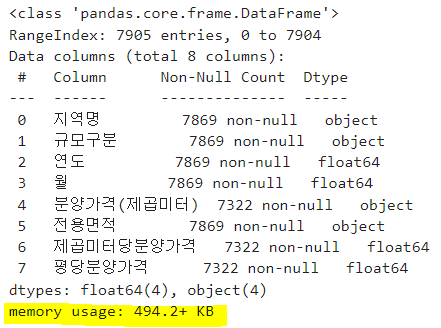

In [91]:
#axis=1이 없으면 axis=0으로 되어 행제거하나 규모구분,분양가격이라는 행이 없어 에러
# "규모구분","분양가격(제곱미터)","제곱미터당분양가격" 컬럼 제거
# 1번 이상 실행하면 이미 삭제된 후이므로, 1번만 실행
df_last.drop(["규모구분", "분양가격(제곱미터)", "제곱미터당분양가격"], axis=1, inplace=True)
df_last.sample

<bound method NDFrame.sample of      지역명      연도     월      전용면적   평당분양가격
0     서울  2015.0  10.0      모든면적  19275.3
1     서울  2015.0  10.0       60㎡  18651.6
2     서울  2015.0  10.0   60㎡~85㎡  19410.6
3     서울  2015.0  10.0  85㎡~102㎡  18879.3
4     서울  2015.0  10.0     102㎡~  19400.7
...   ..     ...   ...       ...      ...
7900  제주  2023.0   6.0      모든면적  24175.8
7901  제주  2023.0   6.0       60㎡  24357.3
7902  제주  2023.0   6.0   60㎡~85㎡  23377.2
7903  제주  2023.0   6.0  85㎡~102㎡  21908.7
7904  제주  2023.0   6.0     102㎡~  24769.8

[7905 rows x 5 columns]>

In [92]:
df_last[df_last['평당분양가격'].isna()]

,지역명,연도,월,전용면적,평당분양가격
28,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
7848,광주,2023.0,6.0,85㎡~102㎡,NaN
7853,대전,2023.0,6.0,85㎡~102㎡,NaN
7863,세종,2023.0,6.0,85㎡~102㎡,NaN
7864,세종,2023.0,6.0,102㎡~,NaN


In [93]:
# 평당 분양가격이 결측치 값인 행 인덱스 출력
df_last[df_last['평당분양가격'].isna()].index # 지울 행

Index([  28,   29,   34,   81,  113,  114,  119,  166,  198,  199,
       ...
       7763, 7768, 7778, 7779, 7803, 7848, 7853, 7863, 7864, 7888],
      dtype='int64', length=583)

In [94]:
# 평당 분양가격이 결측치 값인 행 제거
df_last.drop(df_last[df_last['평당분양가격'].isna()].index, inplace=True)

In [95]:
# 결측치 데이터가 다 없어졌는지 확인
df_last.isna().sum()

지역명       0
연도        0
월         0
전용면적      0
평당분양가격    0
dtype: int64

In [98]:
# df_last 열별데이터갯수, 타입, 메모리 정보 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7322 entries, 0 to 7904
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     7322 non-null   object 
 1   연도      7322 non-null   float64
 2   월       7322 non-null   float64
 3   전용면적    7322 non-null   object 
 4   평당분양가격  7322 non-null   float64
dtypes: float64(3), object(2)
memory usage: 343.2+ KB


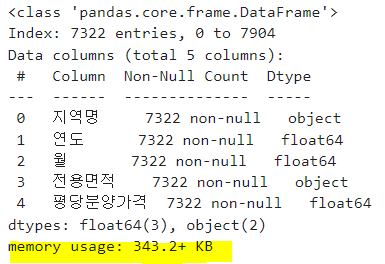

In [97]:
# 전처리 완성된 데이터를 저장
df_last.to_csv('data/신규아파트분양가전처리결과.csv', index=False) # 읽어들일때 index 붙여서 저장할 게 아니니까

# 7. GroupBy이용
 - groupby를 통해 데이터를 그룹화해서 연산
 - <font size="" color="red"><b>df_last.groupby(["인덱스로사용할컬럼명"])['계산할컬럼값"].연산()</b></font>
##  ① 지역별 데이터 수, 평당분양가격(평균)

In [101]:
df_last.groupby(['지역명']).count()

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,453,453,453,453
경기,465,465,465,465
경남,456,456,456,456
경북,443,443,443,443
광주,384,384,384,384
대구,456,456,456,456
대전,345,345,345,345
부산,463,463,463,463
서울,457,457,457,457


In [103]:
df_last.groupby(['지역명'])['연도'].mean()

지역명
강원    2019.176600
경기    2019.129032
경남    2019.118421
경북    2019.135440
광주    2019.125000
대구    2019.164474
대전    2018.997101
부산    2019.114471
서울    2019.091904
세종    2018.882353
울산    2019.263473
인천    2019.138829
전남    2019.077605
전북    2019.138829
제주    2019.137405
충남    2019.134529
충북    2019.125270
Name: 연도, dtype: float64

In [104]:
df_last.groupby?

Signature:
df_last.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of l

In [107]:
# 지역명별 결측치를 제외한 데이터 수
# df_last.groupby(['지역명']).count() → grouping하고 싶은 column전체
# df_last.groupby(['지역명'])['평당분양가격'].count()
df_last.groupby(['지역명'])['평당분양가격'].count().to_frame() # 데이터 프레임 형태로

,평당분양가격
지역명,
강원,453
경기,465
경남,456
경북,443
광주,384
대구,456
대전,345
부산,463
서울,457


In [113]:
# 지역별 평당분양가격 max값나 min값
# df_last.groupby(['지역명']).max()
df_last.groupby(['지역명'])['평당분양가격'].max().to_frame().sort_values(by="평당분양가격") # 낮→높
# df_last.groupby(['지역명'])['평당분양가격'].max().to_frame().sort_values(by="평당분양가격") 에다가 ascending붙임 # 높→낮

,평당분양가격
지역명,
충북,11193.6
전북,12064.8
전남,12780.9
세종,13335.3
경북,13886.4
강원,14899.5
충남,14932.5
경남,16566.0
대전,18879.3


In [115]:
# 지역별 평당분양가격(평균)
df_last.groupby('지역명')['평당분양가격'].mean().round() # .round() 소수점 제거

지역명
강원     9297.0
경기    14562.0
경남    10406.0
경북     9707.0
광주    12076.0
대구    13904.0
대전    11471.0
부산    13718.0
서울    26305.0
세종    10619.0
울산    13196.0
인천    13795.0
전남     8729.0
전북     8486.0
제주    14815.0
충남     9303.0
충북     8392.0
Name: 평당분양가격, dtype: float64

In [116]:
# 지역별 평당분양가격 min, max, mean, 사분위수
df_last.groupby('지역명')['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,453.0,9297.425828,2060.578756,6639.6,7543.800,8794.50,10718.40,14899.5
경기,465.0,14561.927742,2476.079124,10160.7,12705.000,14341.80,16130.40,22585.2
경남,456.0,10405.949342,2041.743878,7260.0,9044.475,9881.85,11559.90,16566.0
경북,443.0,9707.467720,1893.598573,6949.8,8258.250,8946.30,11173.80,13886.4
광주,384.0,12075.542187,2951.907212,7428.3,9504.000,11751.30,14345.10,24951.3
대구,456.0,13903.696053,2698.921762,8259.9,11731.500,14414.40,16074.30,21539.1
대전,345.0,11471.316522,2628.147459,8002.5,9005.700,11117.70,13681.80,18879.3
부산,463.0,13717.907559,2723.232470,9669.0,12262.800,13104.30,14554.65,23129.7
서울,457.0,26305.108753,4939.735535,16701.3,22139.700,25967.70,29373.30,45655.5


In [118]:
# 전용면적별 평당분양가격(평균)
df_last.groupby('전용면적')['평당분양가격'].mean().to_frame().sort_values(by="평당분양가격")

,평당분양가격
전용면적,
60㎡,11859.274417
60㎡~85㎡,11895.030518
모든면적,11923.028544
85㎡~102㎡,12750.729685
102㎡~,13152.676793


∴ 큰 평수가 평당분양가격이 높음

In [125]:
# 지역별, 전용면적별 평당분양가격(평균)
 # 전용면적가 컬럼값으로 표
# df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean() # 가독성 떨어짐
# df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack()
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack().round() # 소수점 뒤에 자르기

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,모든면적
지역명,,,,,
강원,10503.0,8816.0,8637.0,9802.0,8795.0
경기,15778.0,14381.0,13819.0,14976.0,13856.0
경남,10968.0,9750.0,9642.0,12009.0,9689.0
경북,10524.0,9104.0,9270.0,10539.0,9297.0
광주,13880.0,11124.0,11779.0,11587.0,11903.0
대구,15059.0,13606.0,13669.0,13484.0,13660.0
대전,15138.0,11035.0,11112.0,9078.0,11160.0
부산,14352.0,13355.0,13705.0,13459.0,13731.0
서울,26611.0,26281.0,25522.0,27591.0,25569.0


In [126]:
# 연도별, 지역명별 평당분양가격
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015.0,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8191.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016.0,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017.0,7319.0,12296.0,8807.0,8288.0,9600.0,12192.0,9913.0,11638.0,21864.0,9133.0,10630.0,11672.0,7413.0,7406.0,12629.0,8157.0,7463.0
2018.0,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019.0,8934.0,15666.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020.0,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021.0,10291.0,14567.0,11302.0,11227.0,13710.0,15586.0,11994.0,14318.0,29380.0,12578.0,14192.0,15774.0,9981.0,9048.0,22302.0,9861.0,8822.0
2022.0,11644.0,16622.0,12456.0,12018.0,15096.0,16822.0,14114.0,18167.0,29129.0,11310.0,17904.0,17342.0,10636.0,10003.0,18954.0,11730.0,10034.0
2023.0,12334.0,19780.0,13183.0,12451.0,17745.0,17644.0,16506.0,18452.0,31581.0,12278.0,19188.0,16070.0,11046.0,10635.0,23073.0,12416.0,10792.0


In [127]:
# 연도가 column으로 오도록
df_last.groupby(['지역명', '연도'])['평당분양가격'].mean().unstack().round()

연도,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
지역명,,,,,,,,,
강원,7188.0,7163.0,7319.0,8219.0,8934.0,10302.0,10291.0,11644.0,12334.0
경기,11061.0,11685.0,12296.0,14258.0,15666.0,15106.0,14567.0,16622.0,19780.0
경남,8459.0,8497.0,8807.0,9328.0,10698.0,10919.0,11302.0,12456.0,13183.0
경북,7464.0,7753.0,8288.0,8681.0,9050.0,9998.0,11227.0,12018.0,12451.0
광주,7917.0,9191.0,9600.0,9527.0,12112.0,13406.0,13710.0,15096.0,17745.0
대구,9019.0,10282.0,12192.0,12139.0,14082.0,15314.0,15586.0,16822.0,17644.0
대전,8191.0,8911.0,9913.0,10234.0,12619.0,11239.0,11994.0,14114.0,16506.0
부산,10377.0,10744.0,11638.0,12890.0,13538.0,13353.0,14318.0,18167.0,18452.0
서울,20316.0,21753.0,21864.0,23202.0,28287.0,29781.0,29380.0,29129.0,31581.0


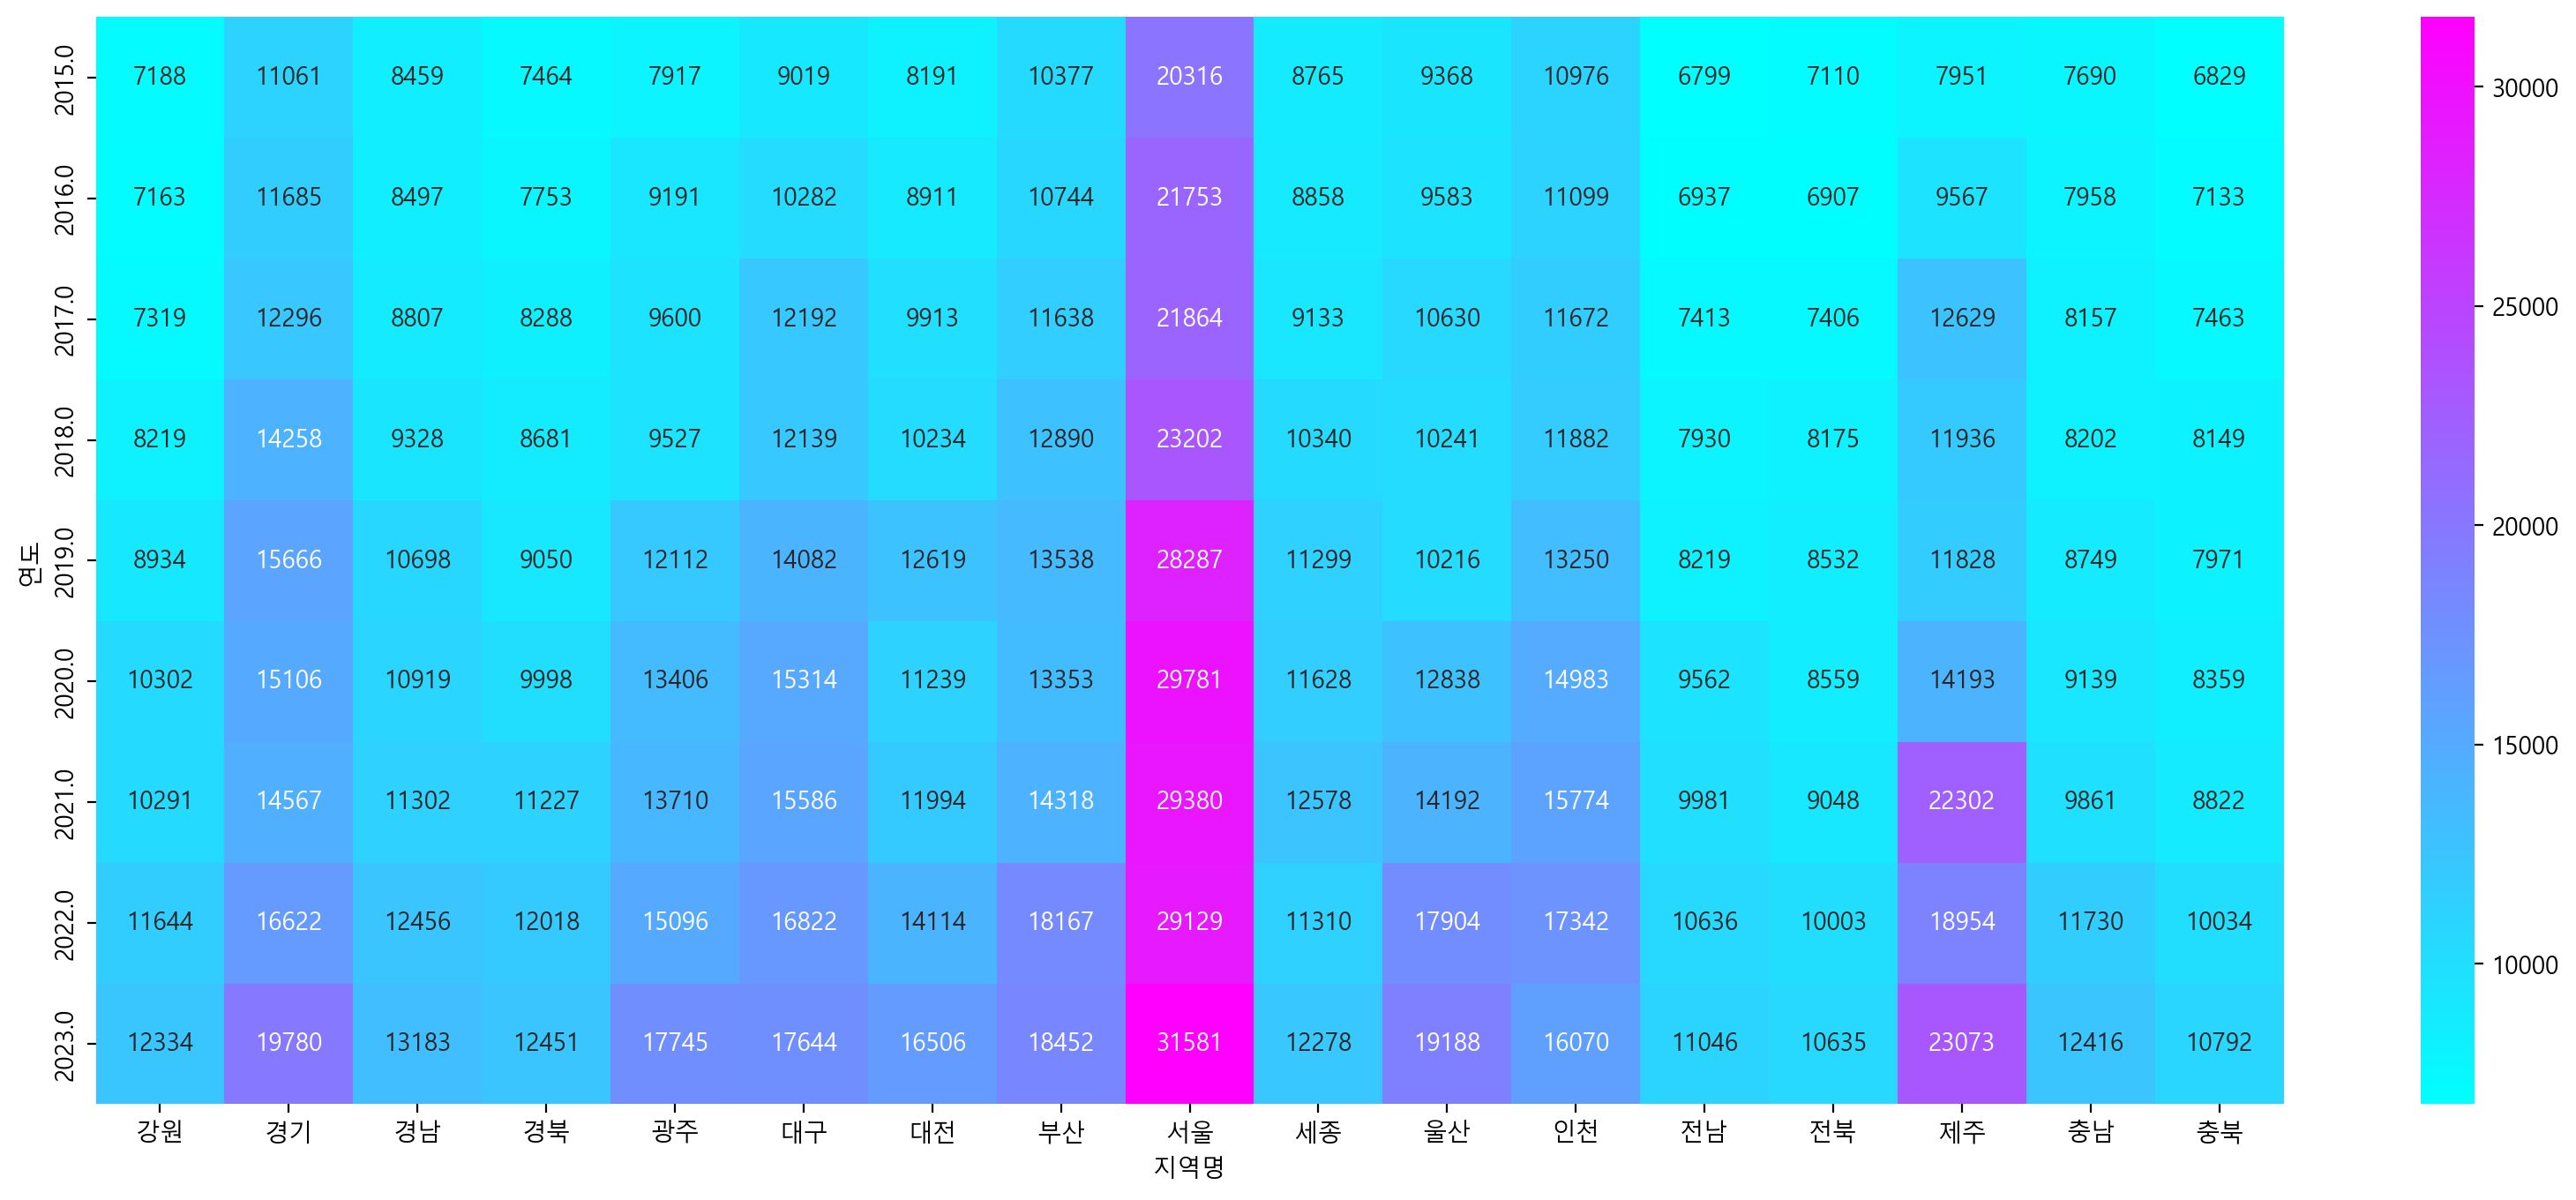

In [140]:
# 위에서의 r을 연도별, 지역명별 평당분양가격을 heatmap으로 시각화
r = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().round()
plt.figure(figsize=(20,8))
sns.heatmap(r, cmap='cool', annot=True, fmt='.0f')
plt.show()

# 8. 위의 그룹화한 내용을 막대그래프로 시각화

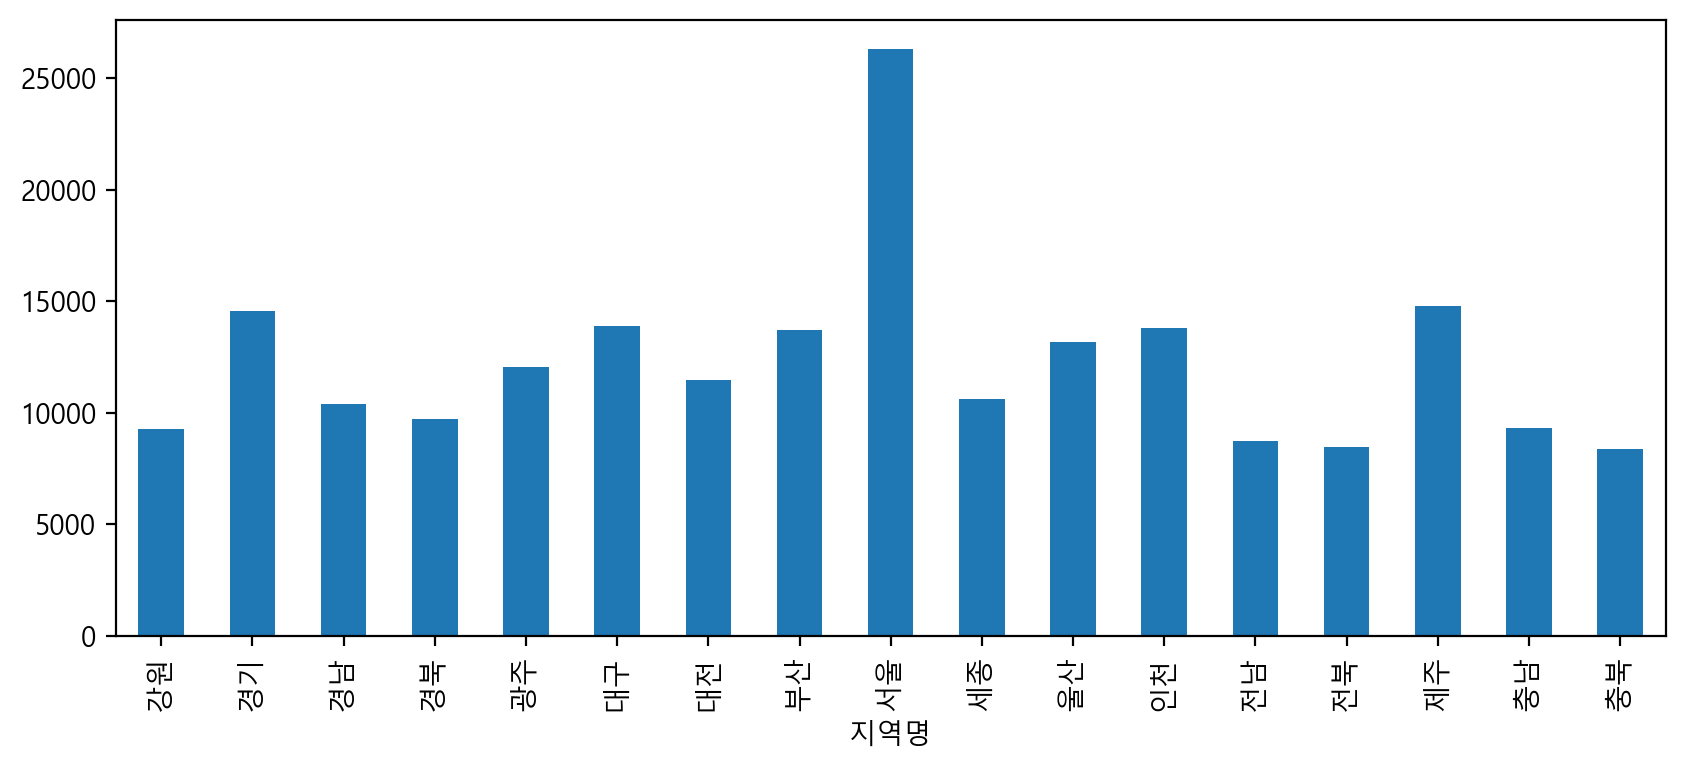

In [143]:
# 지역별 평균 평당분양가격을 내림차순정렬하여 막대그래프로 시각화
r = df_last.groupby('지역명')['평당분양가격'].mean() #지역별 평균 평당분양가격
r.plot(kind='bar', figsize=(10,4))
plt.show()

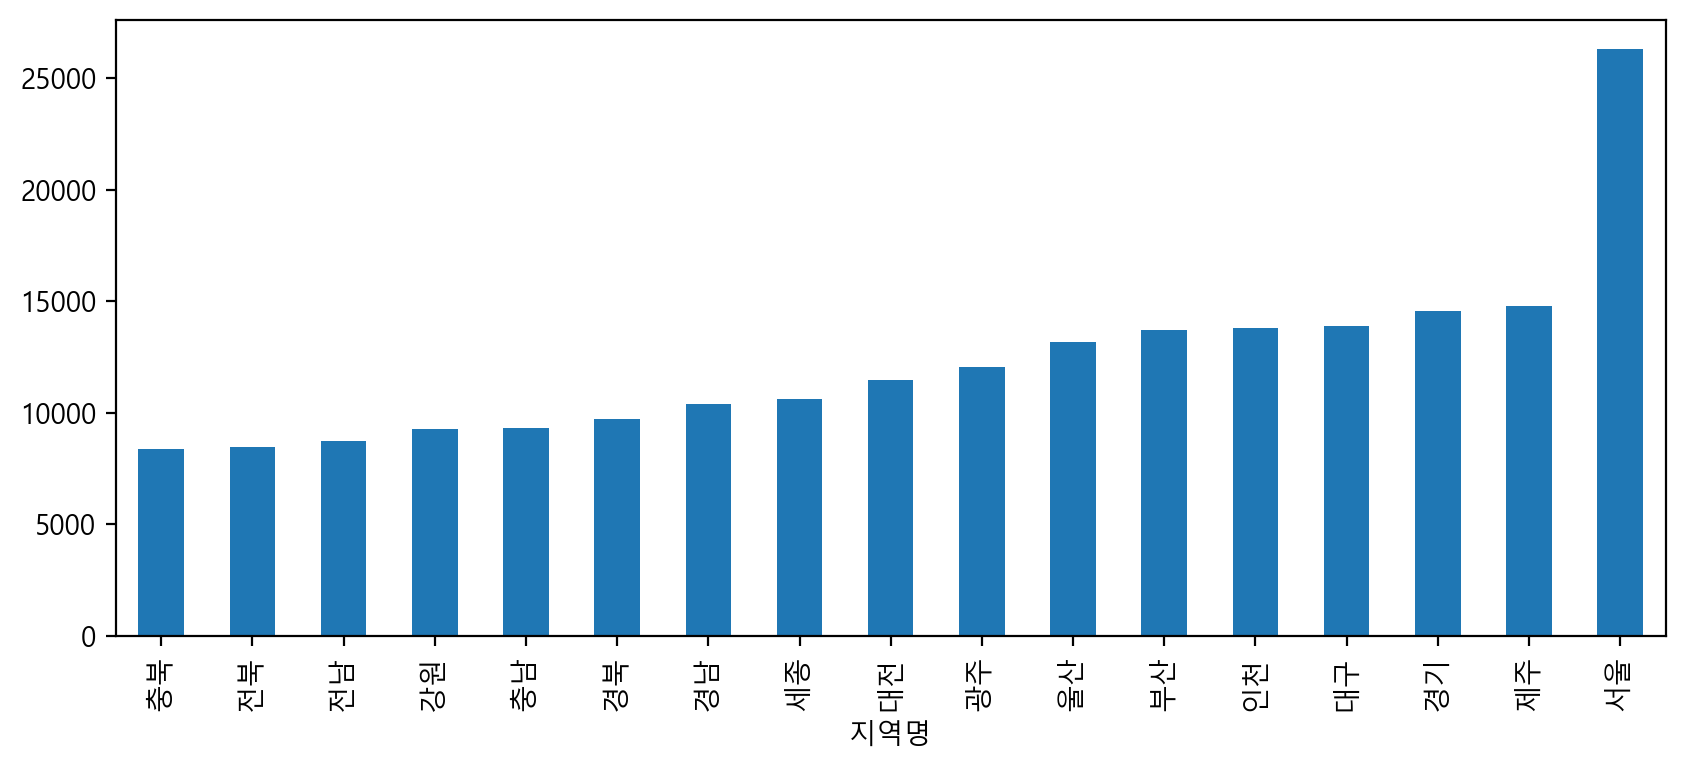

In [145]:
# 지역별 평균 평당분양가격을 내림차순정렬하여 막대그래프로 시각화
r = df_last.groupby('지역명')['평당분양가격'].mean().sort_values() #경기, 제주 비교 잘 안됨
r.plot(kind='bar', figsize=(10,4))
plt.show()

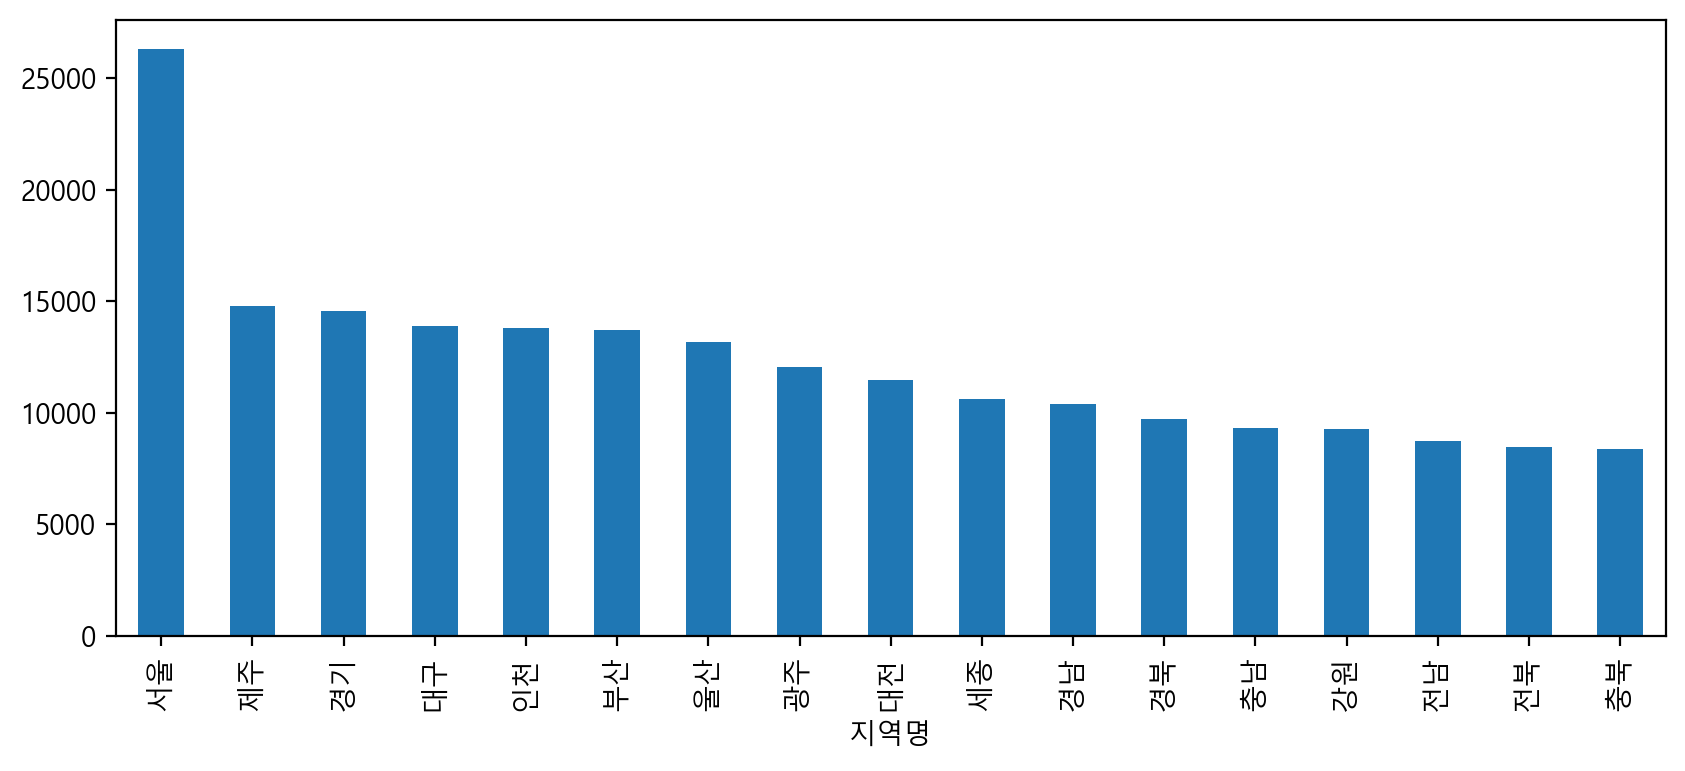

In [146]:
# 지역별 평균 평당분양가격을 내림차순정렬하여 막대그래프로 시각화
r = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False) #경기, 제주 비교 잘 안됨
r.plot(kind='bar', figsize=(10,4))
plt.show()

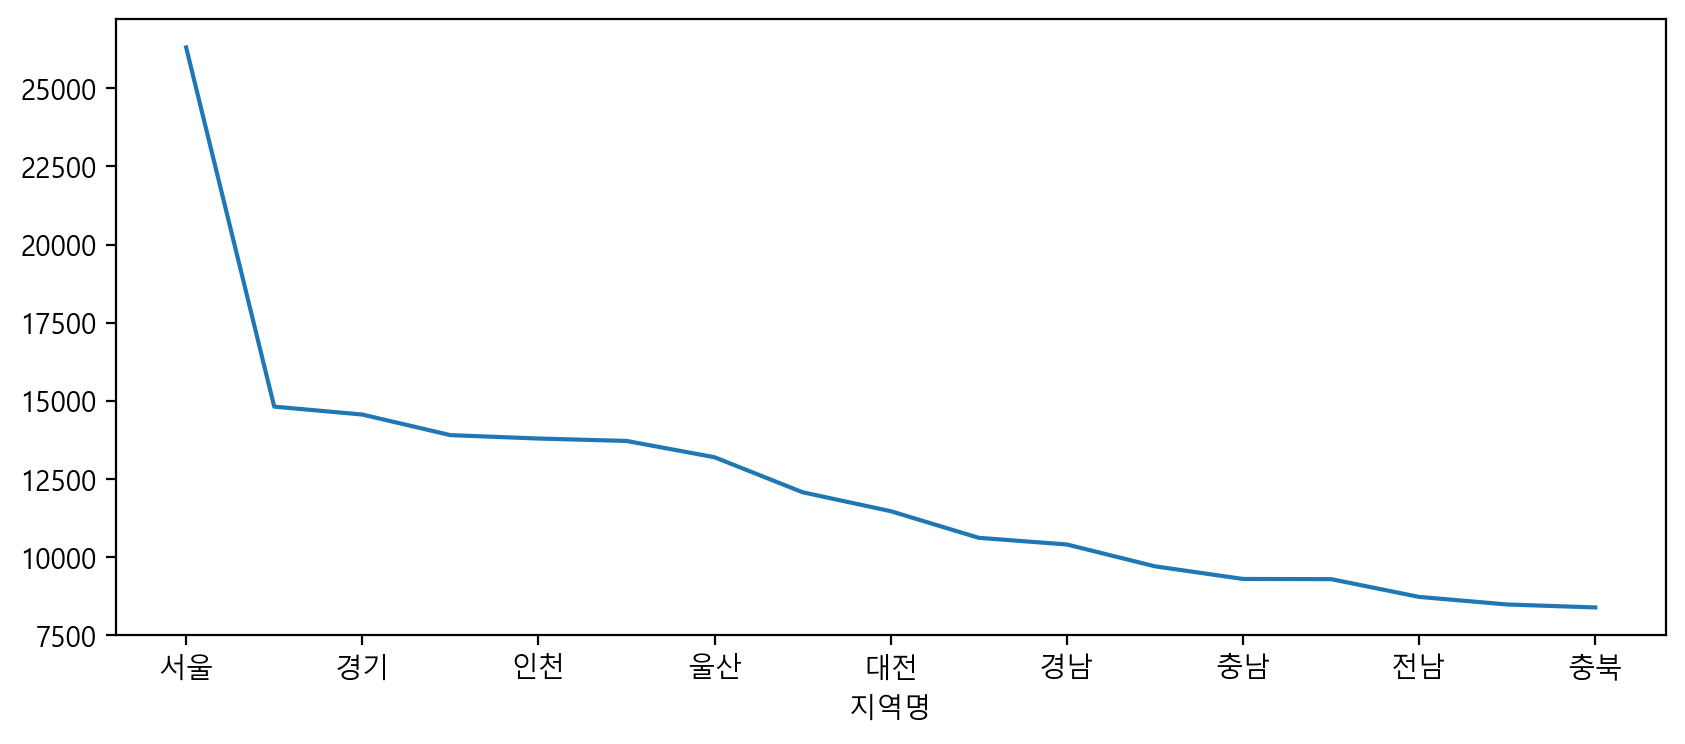

In [148]:
# 지역별 정렬된 평균 평당분양가격 lineplot
r.plot(figsize=(10,4)) #kind의 default는 lineplot
plt.show()

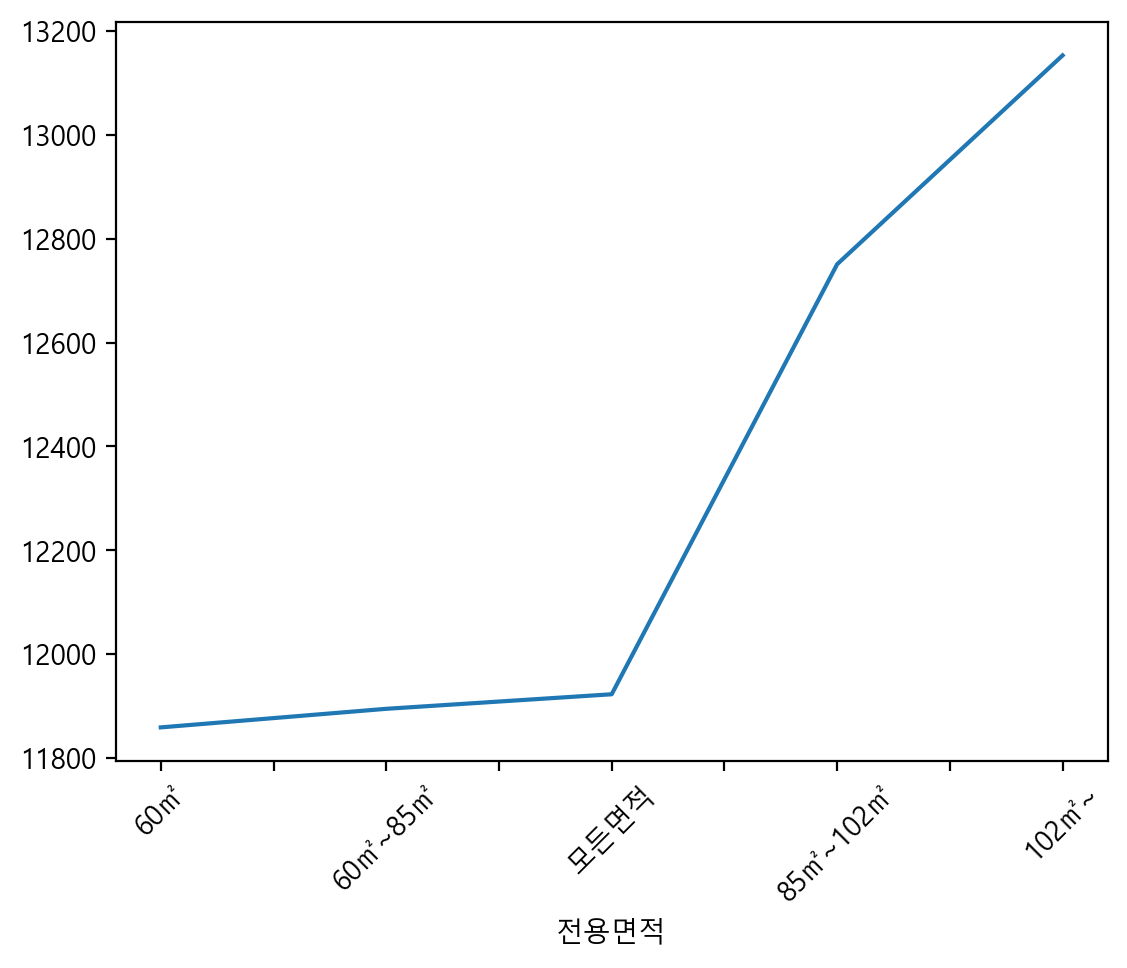

In [156]:
# 전용면적별 평균  평당분양가격 그래프
df_last.groupby('전용면적')['평당분양가격'].mean().sort_values().plot(rot=45) # rot 회전
plt.show()

In [158]:
# 월별, 연도별 평당분양가격 변동
df_last.groupby(['월','연도'])['평당분양가격'].mean().unstack().round()

연도,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
월,,,,,,,,,
1.0,NaN,9334.0,10095.0,10719.0,11536.0,12718.0,13323.0,14356.0,16124.0
2.0,NaN,9361.0,10111.0,10767.0,11575.0,12718.0,13407.0,14409.0,16003.0
3.0,NaN,9423.0,10107.0,10905.0,11610.0,12739.0,13672.0,14611.0,16119.0
4.0,NaN,9602.0,10217.0,10921.0,11778.0,12954.0,13599.0,14811.0,16210.0
5.0,NaN,9602.0,10359.0,11087.0,11976.0,12993.0,13574.0,14724.0,16468.0
6.0,NaN,9676.0,10432.0,10922.0,12402.0,13168.0,13614.0,14768.0,16743.0
7.0,NaN,9701.0,10550.0,10868.0,12425.0,12998.0,13609.0,14829.0,NaN
8.0,NaN,9719.0,10565.0,10811.0,12524.0,13227.0,13640.0,15022.0,NaN
9.0,NaN,9738.0,10584.0,10915.0,12528.0,13275.0,13627.0,15060.0,NaN


Boxplot (상자수염그림)
https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

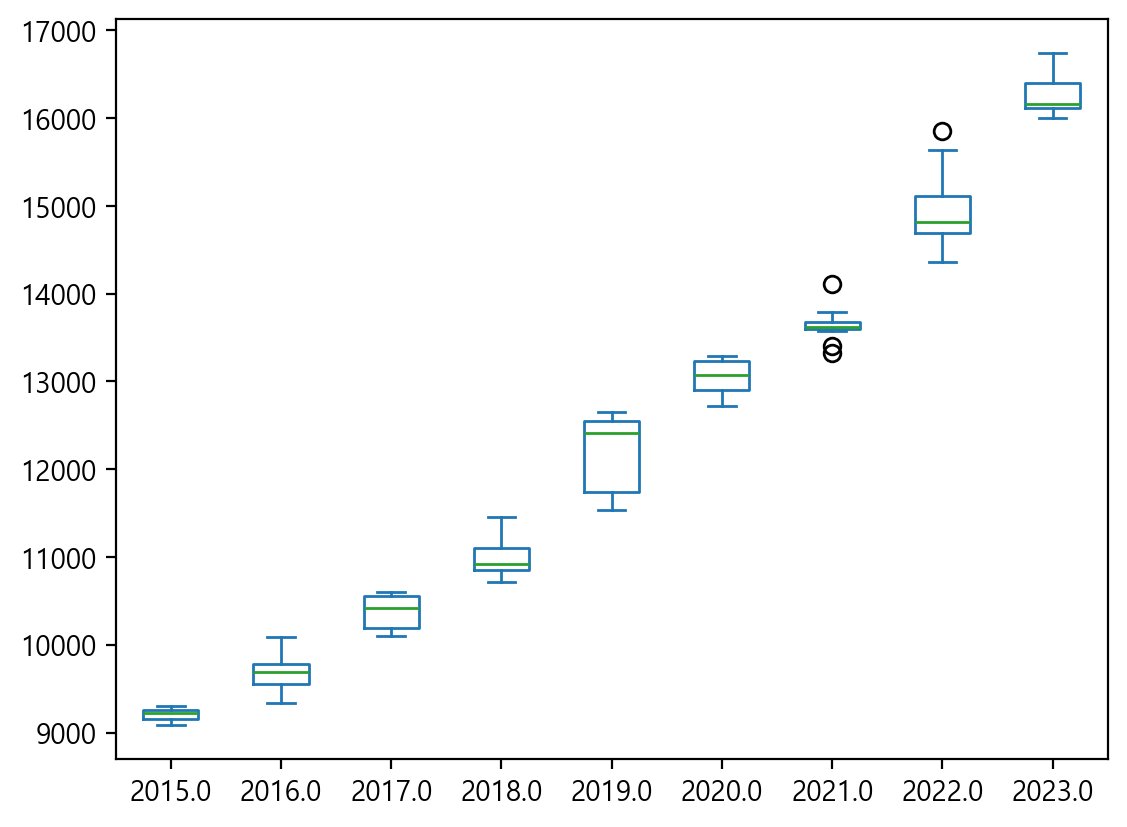

In [160]:
# 위의 월별, 연도별, 평당분양가격 boxplot
r = df_last.groupby(['월','연도'])['평당분양가격'].mean().unstack().round()
r.plot(kind='box')
plt.show()

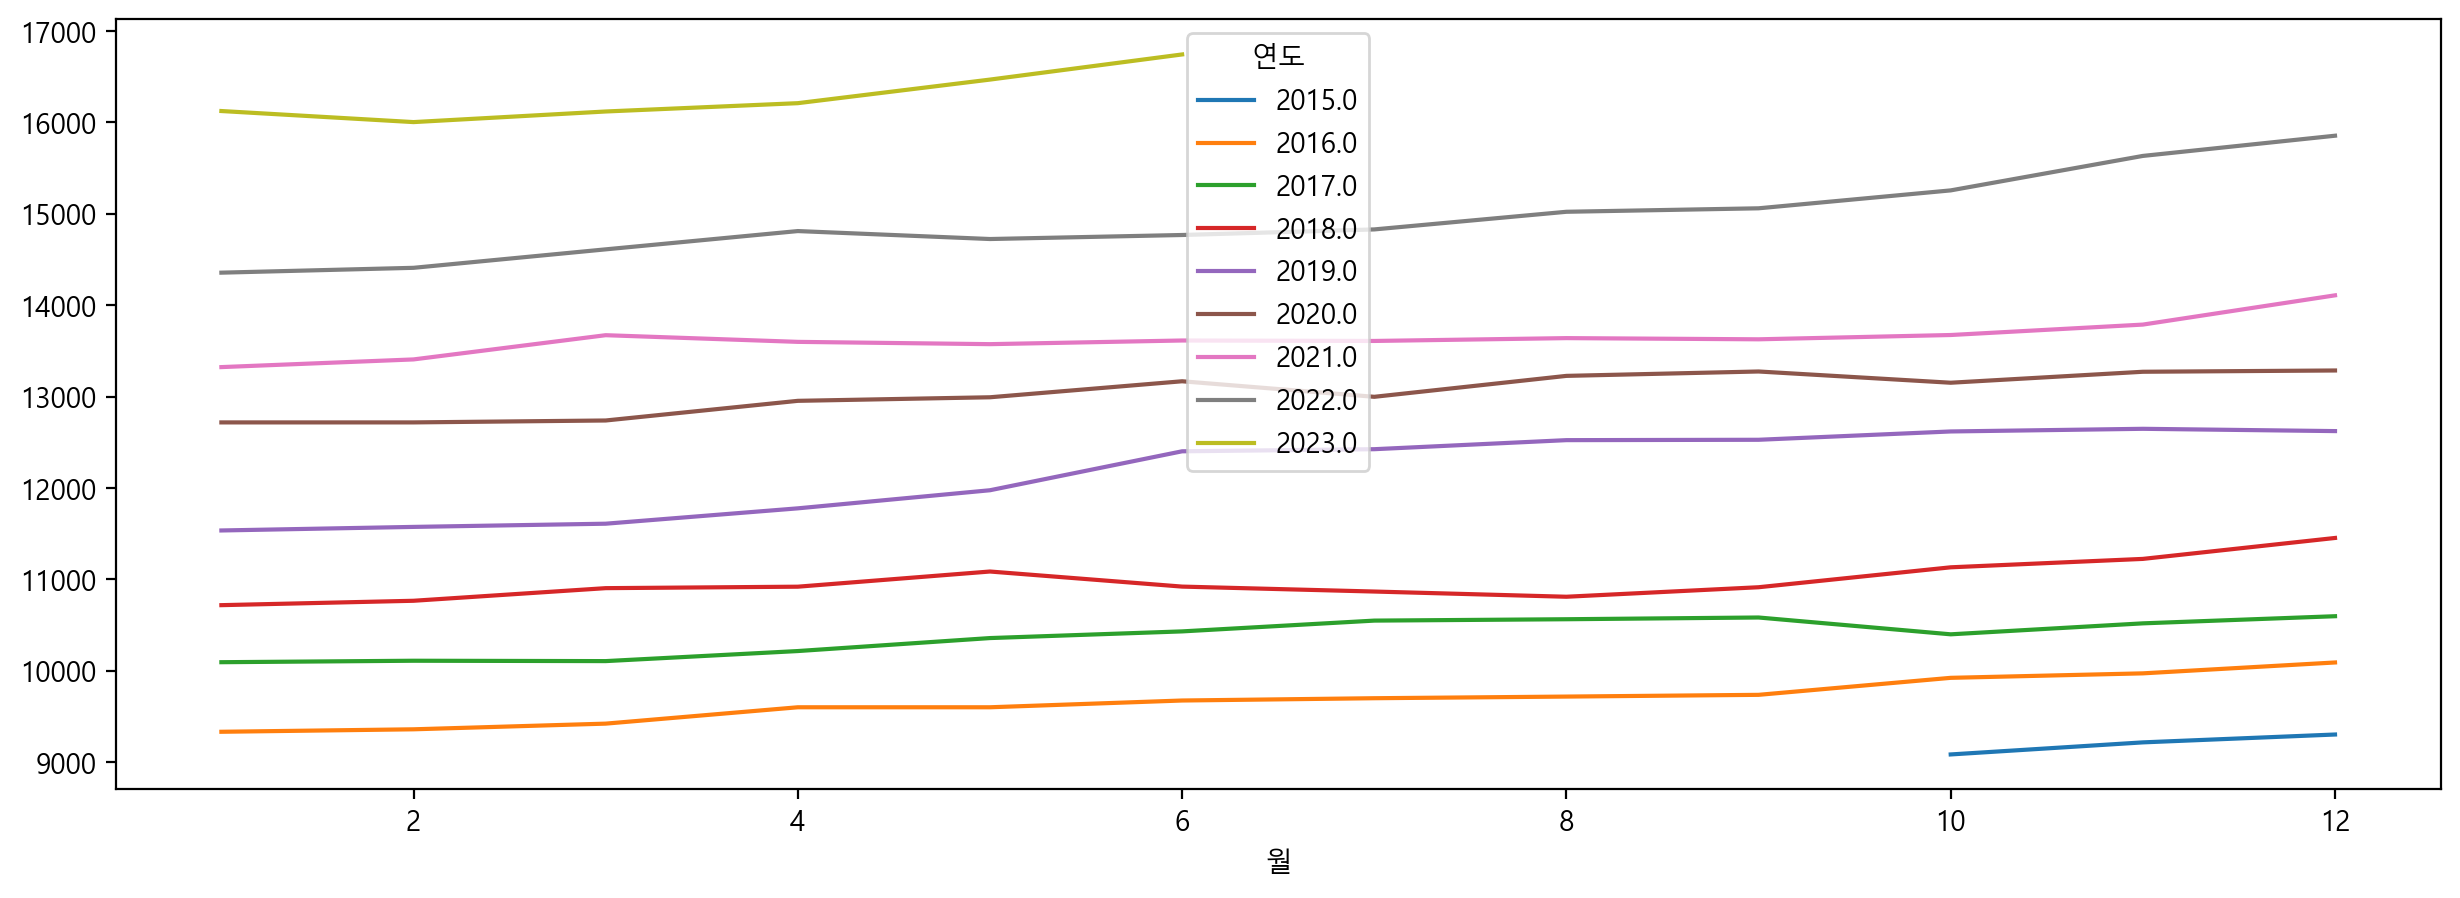

In [162]:
# 위의 월별, 연도별, 평당분양가격 lineplot => 월별, 연도별 분양가 상한선 확인
r.plot(figsize=(15,5))
plt.show()

In [ ]:
# boxplot으로 지역별 평당분양가격 시각화
plt.figure(figsize=(15,5))
sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None)
plt.show()

# 9. seaborn으로 시각화(위에서 그린 시각화내용을 일부또는 그 이상을 seaborn으로 시각화)

## ① 지역별 평당분양가격(평균)

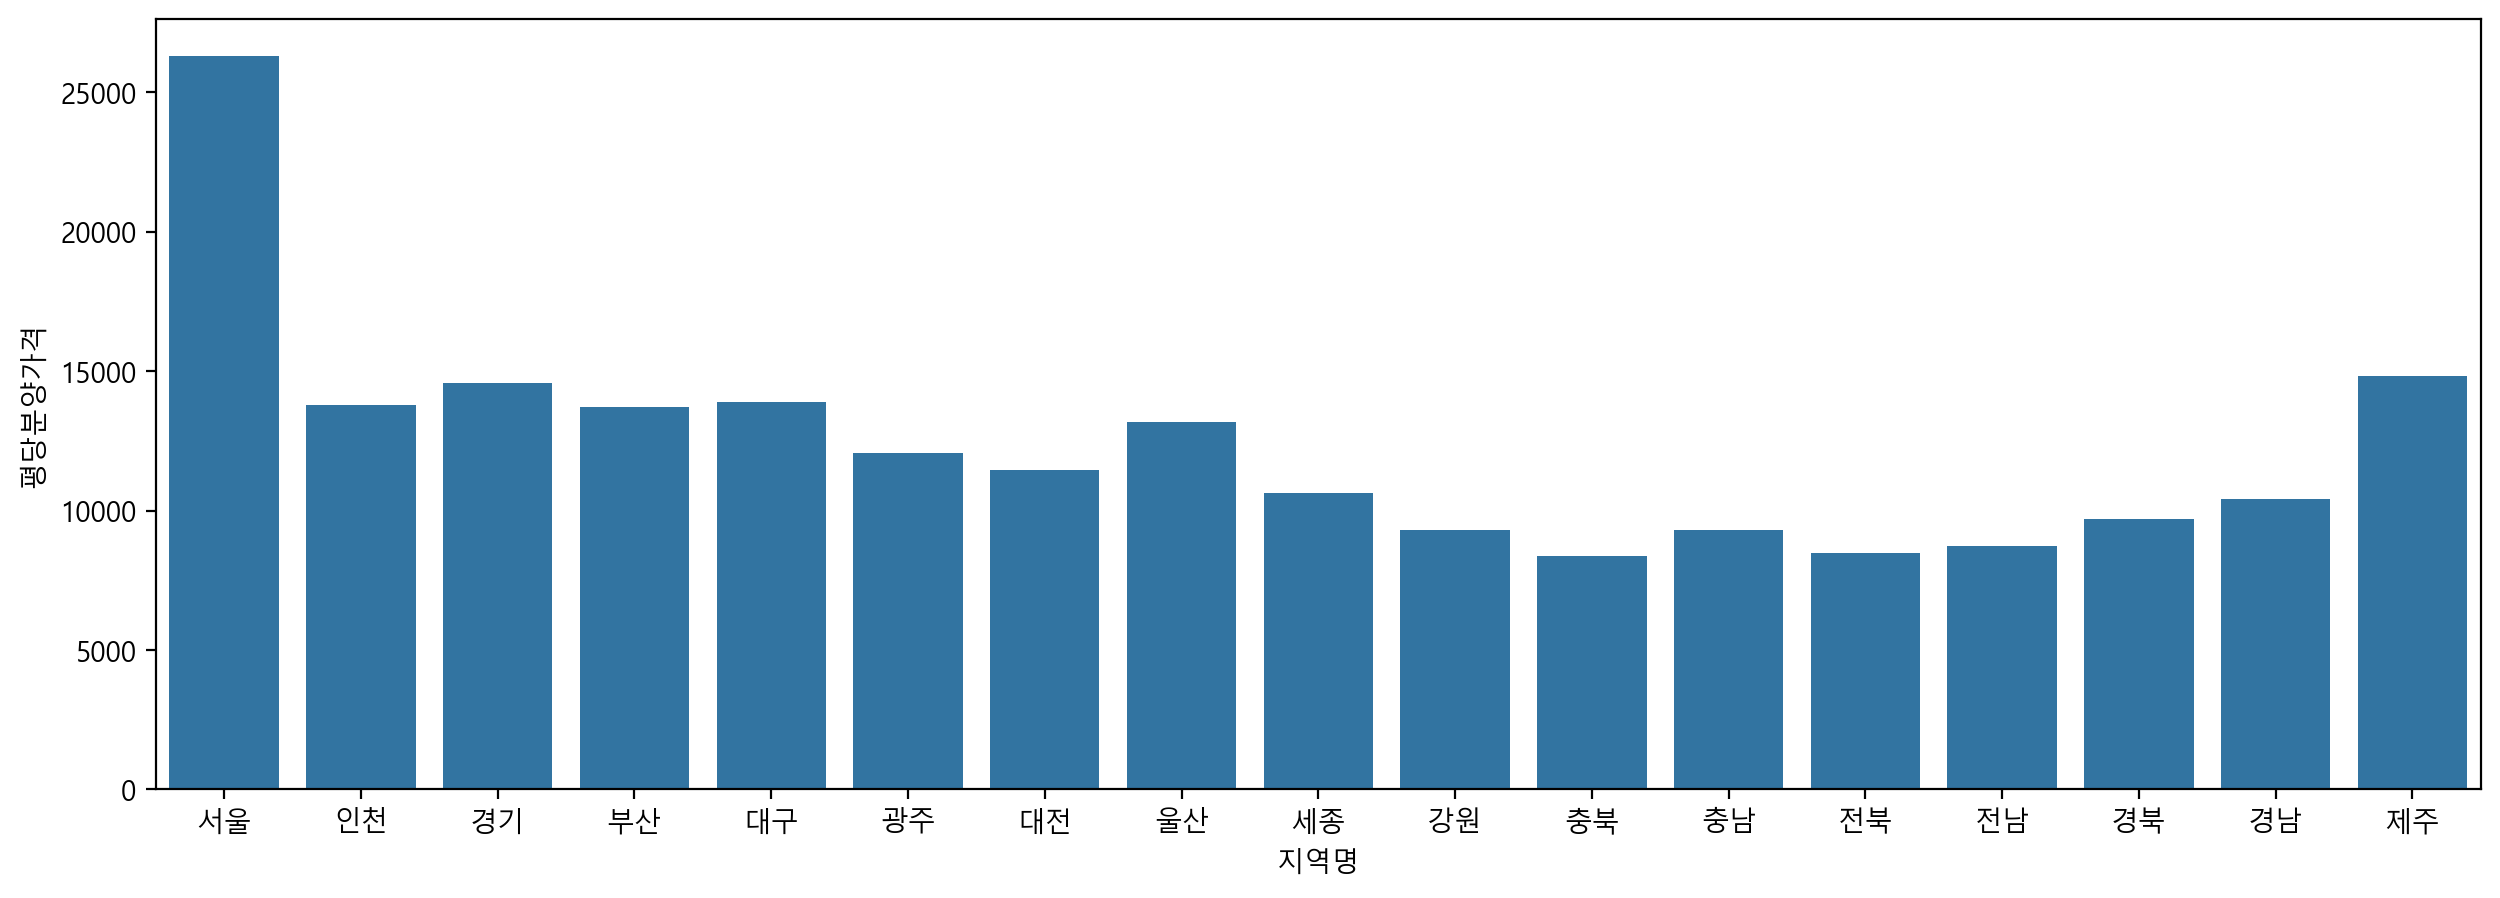

In [167]:
# 지역별 평당 분양가격
#r = df_last.groupby('지역명')['평당분양가격'].mean()
#r
plt.figure(figsize=(15,5))
sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None)
plt.show()

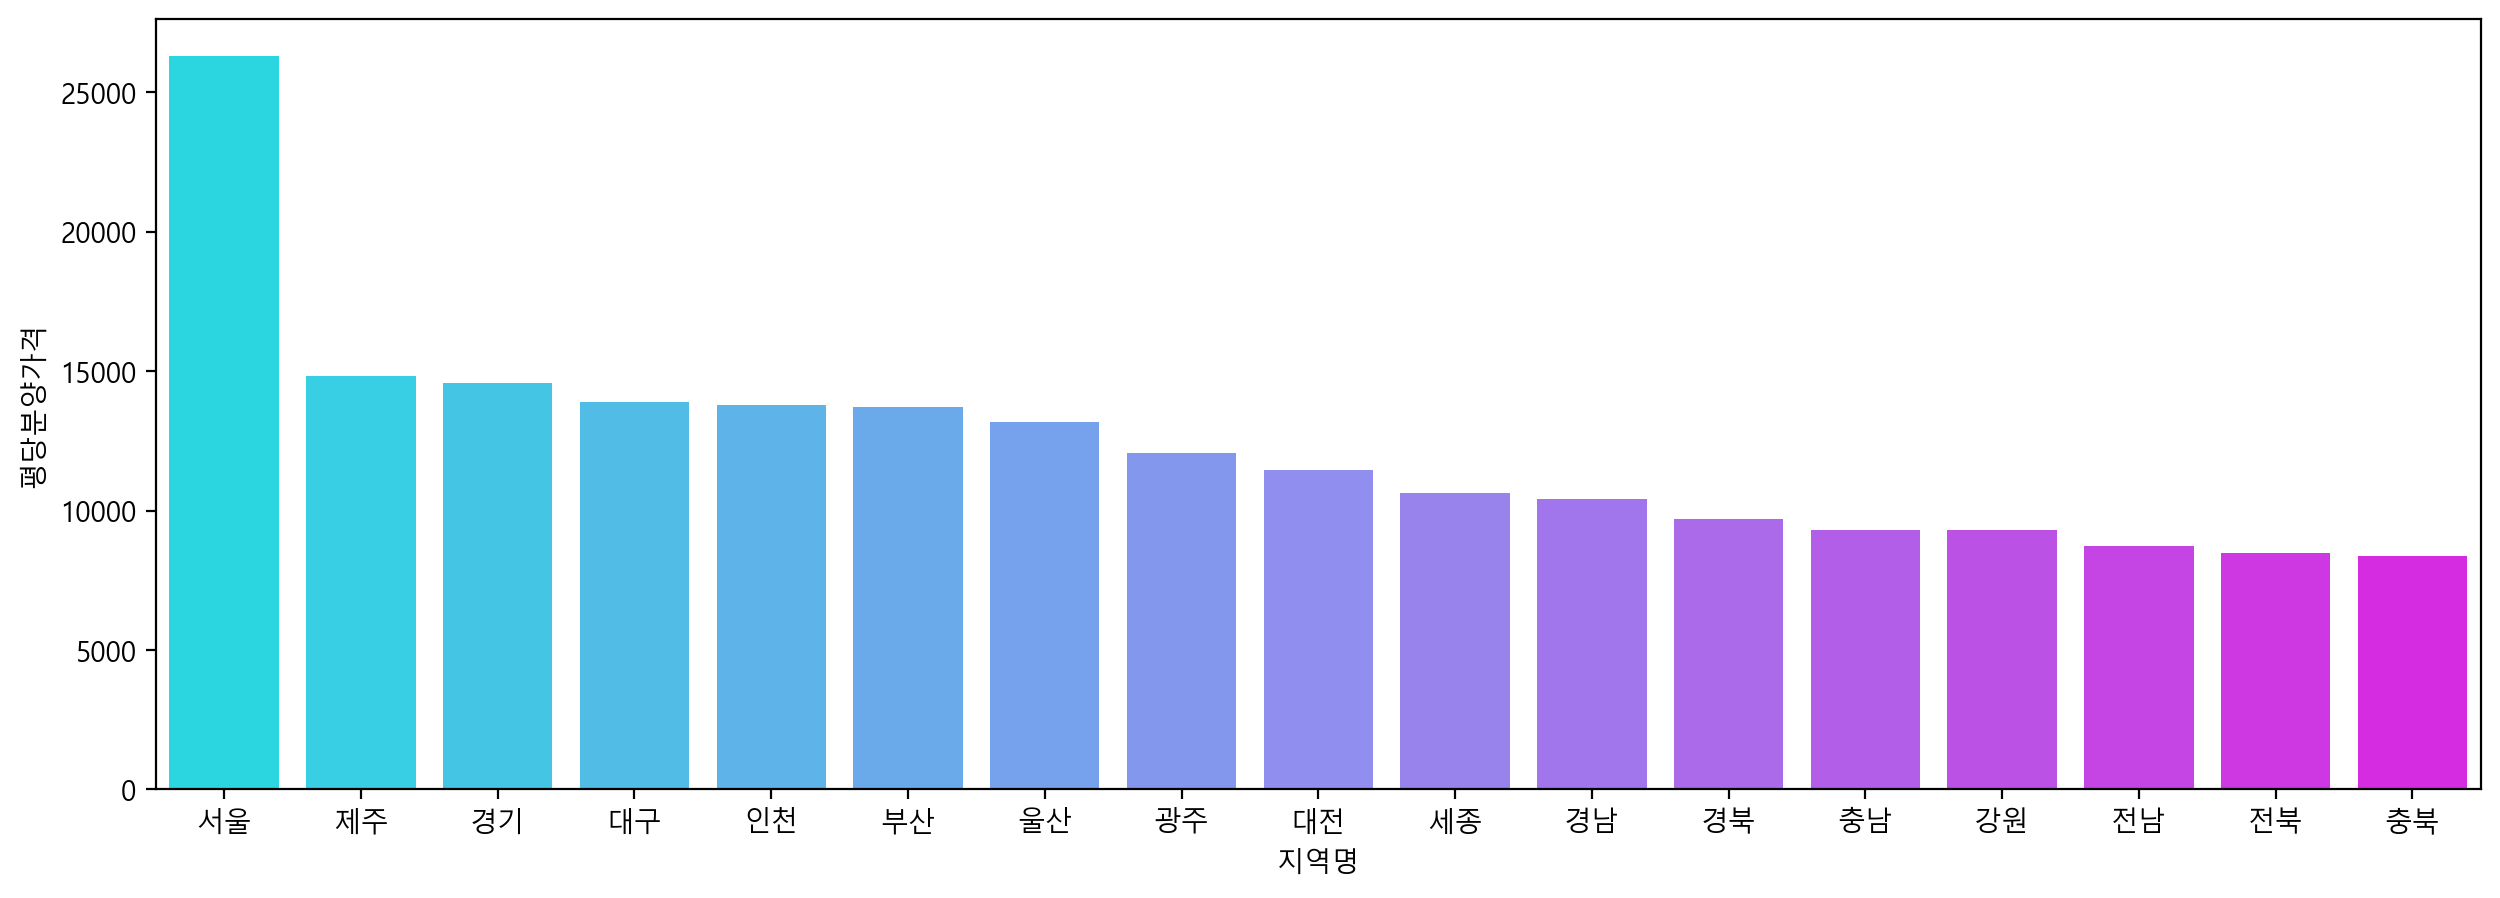

In [174]:
# 만약 정렬을 원한다면 groupby후 sort_values()한후 시각화한다.
plt.figure(figsize=(15,5))
r = df_last.groupby('지역명')['평당분양가격'].mean().sort_values(ascending=False).to_frame()
sns.barplot(data=r, x=r.index, y='평당분양가격', palette="cool")
plt.show()

## ② 연도별 평당분양가격(평균)

<Axes: xlabel='연도', ylabel='평당분양가격'>

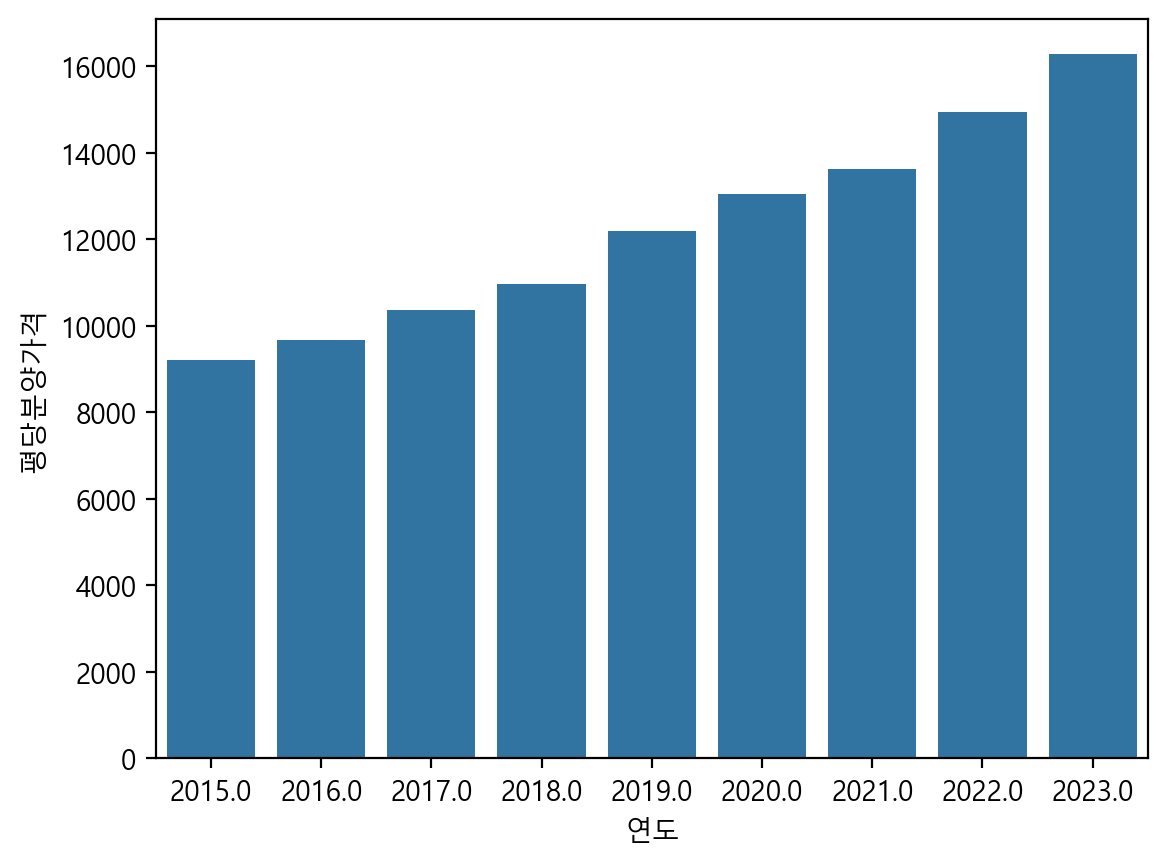

In [175]:
# 연도별 평당분양가격 barplot
sns.barplot(data=df_last, x="연도", y="평당분양가격", ci=None)

<Axes: xlabel='연도', ylabel='평당분양가격'>

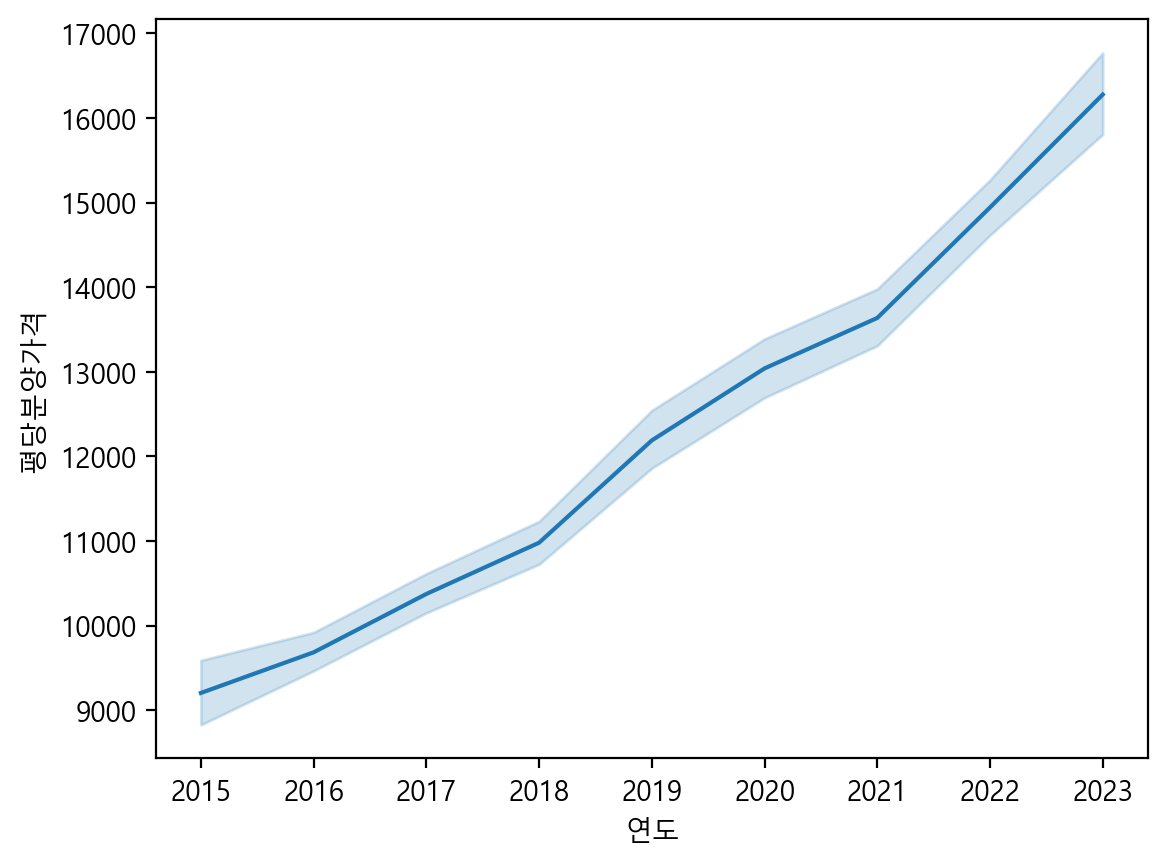

In [176]:
# 년도별 평균 평당분양가격의 추이
sns.lineplot(data=df_last, x='연도', y='평당분양가격')

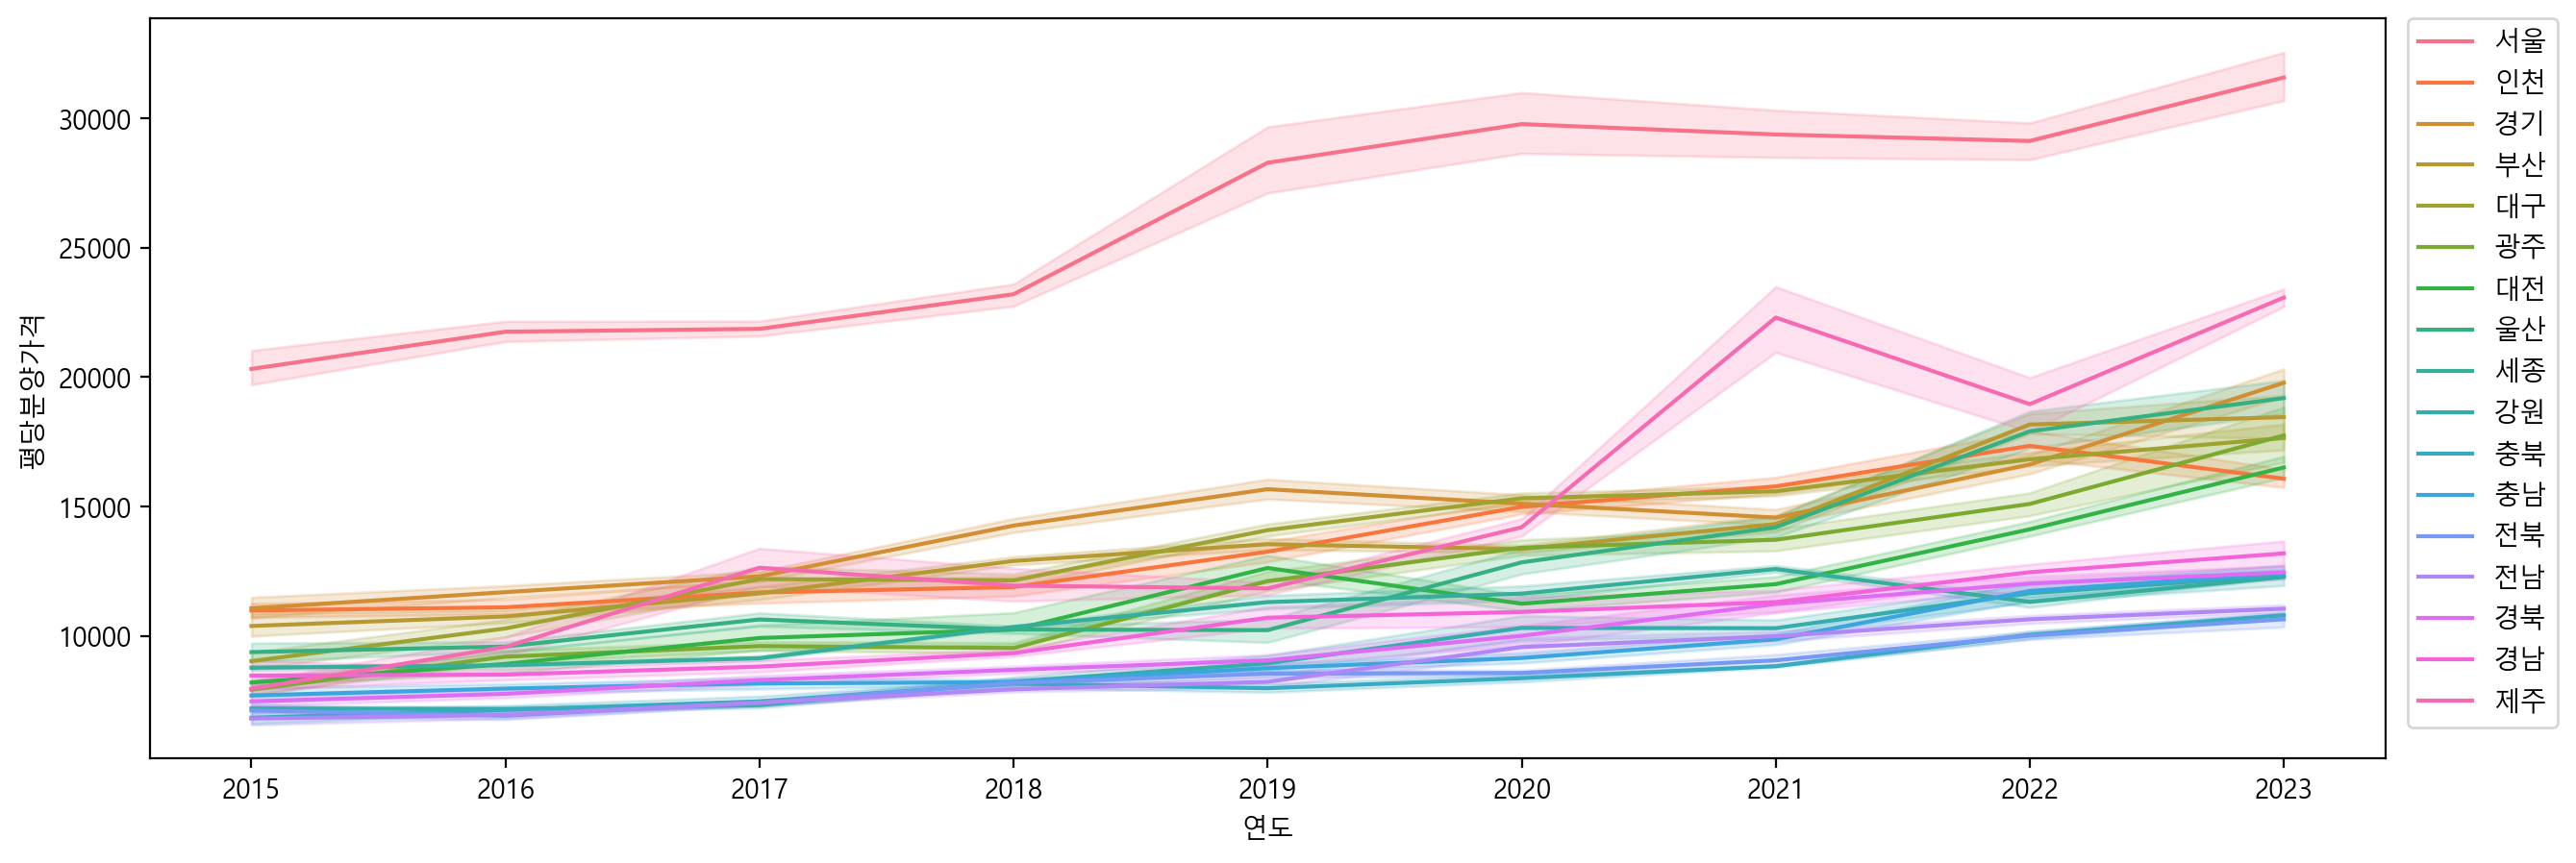

In [180]:
# 년도별 지역별 평균 평당분양가격
plt.figure(figsize=(15,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

<Axes: xlabel='연도', ylabel='평당분양가격'>

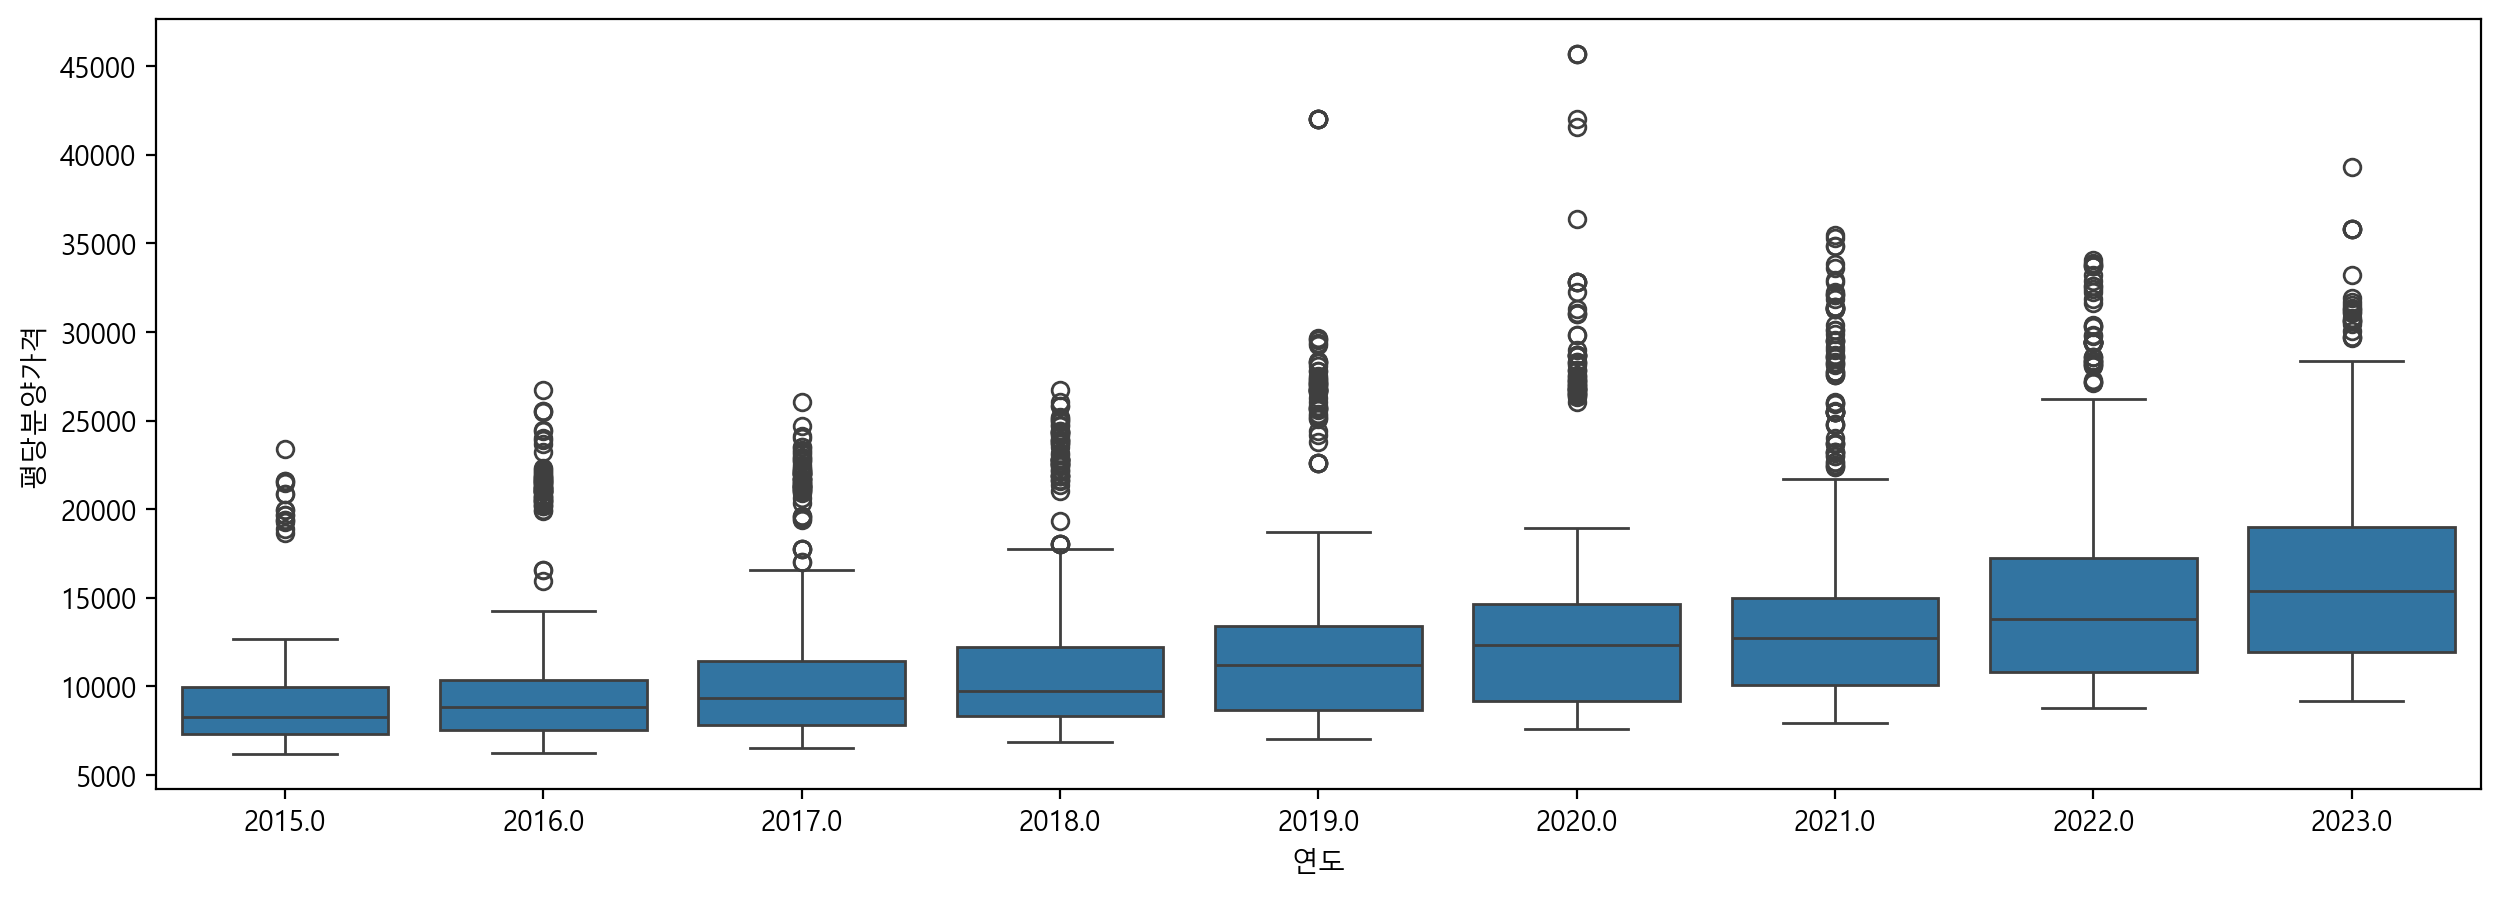

In [185]:
# 연도별 평당분양가격의 사분위수(boxplot) ⇒ "x="연도"
plt.figure(figsize=(15,5))
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<Axes: ylabel='평당분양가격'>

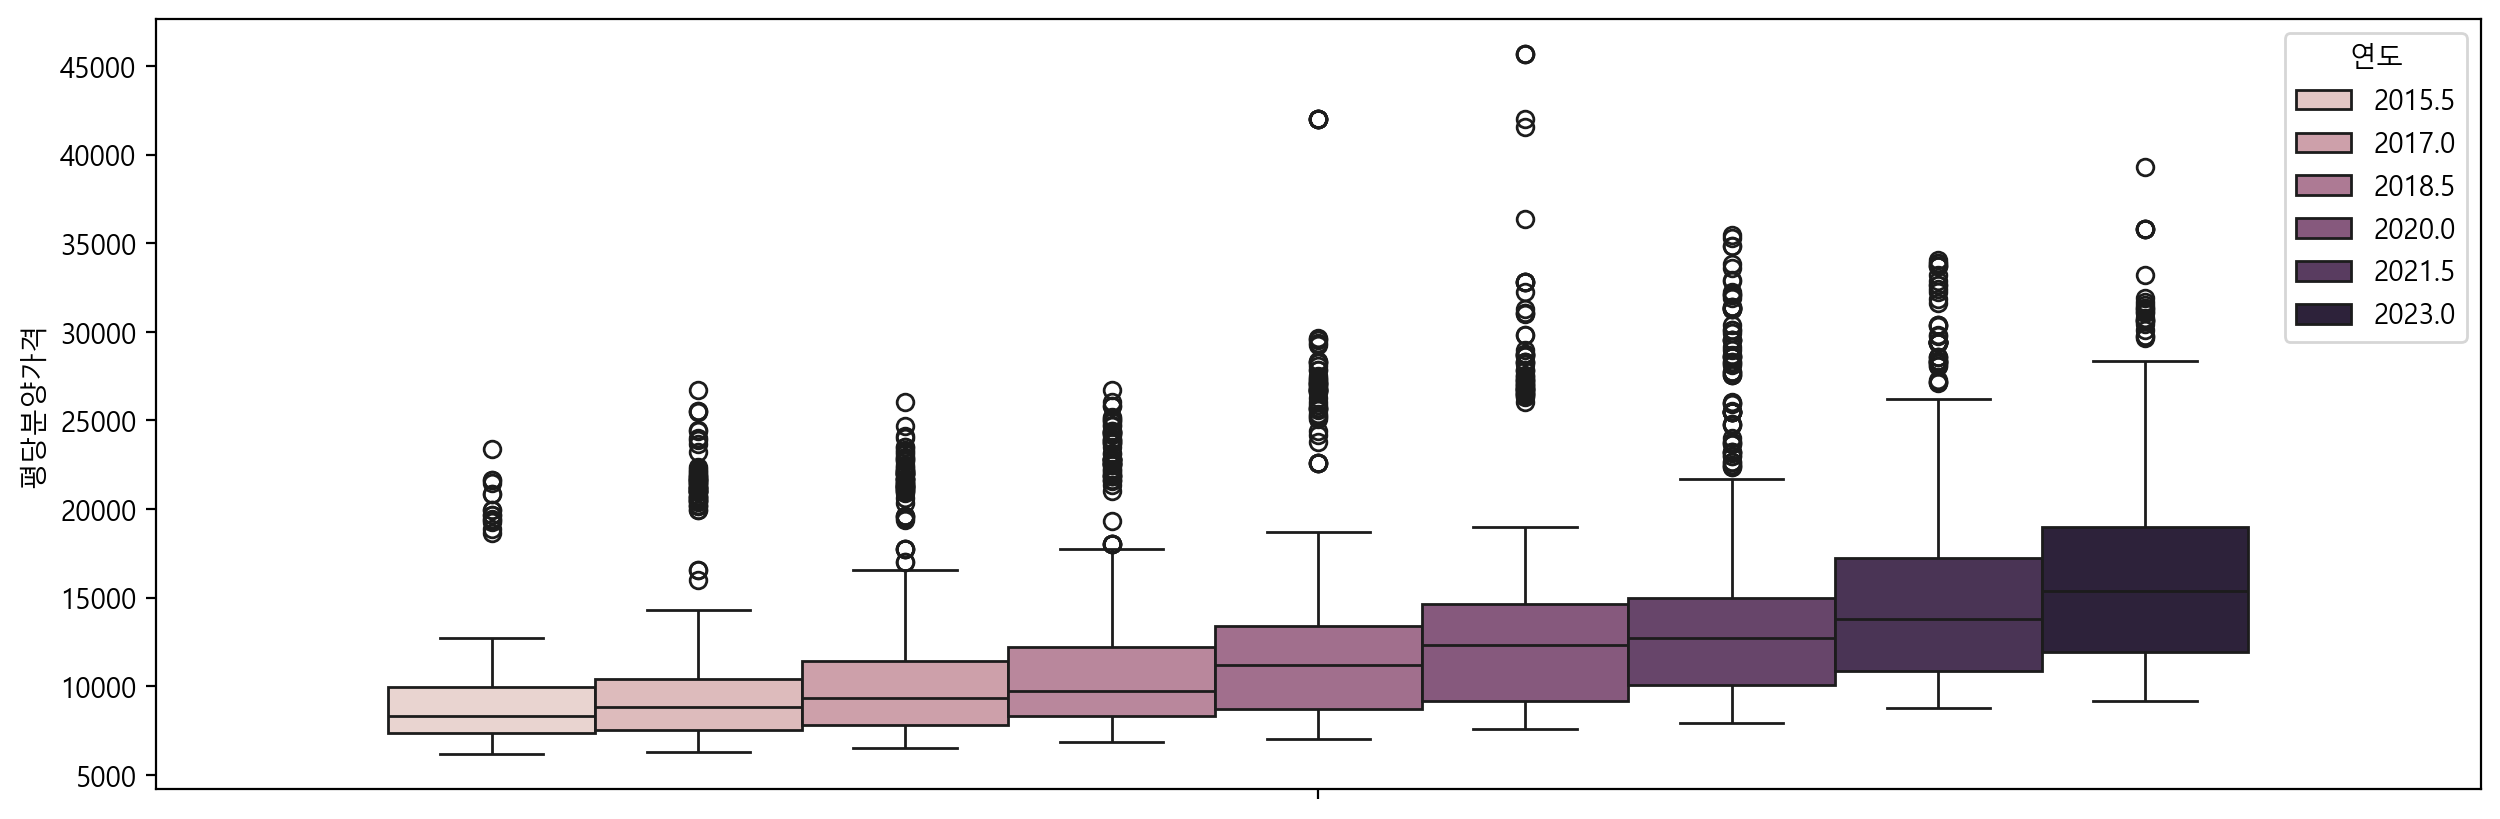

In [186]:
# 연도별 평당분양가격의 사분위수(boxplot) ⇒ hue="연도"
plt.figure(figsize=(15,5))
sns.boxplot(data=df_last, hue="연도", y="평당분양가격")

<Axes: xlabel='연도', ylabel='평당분양가격'>

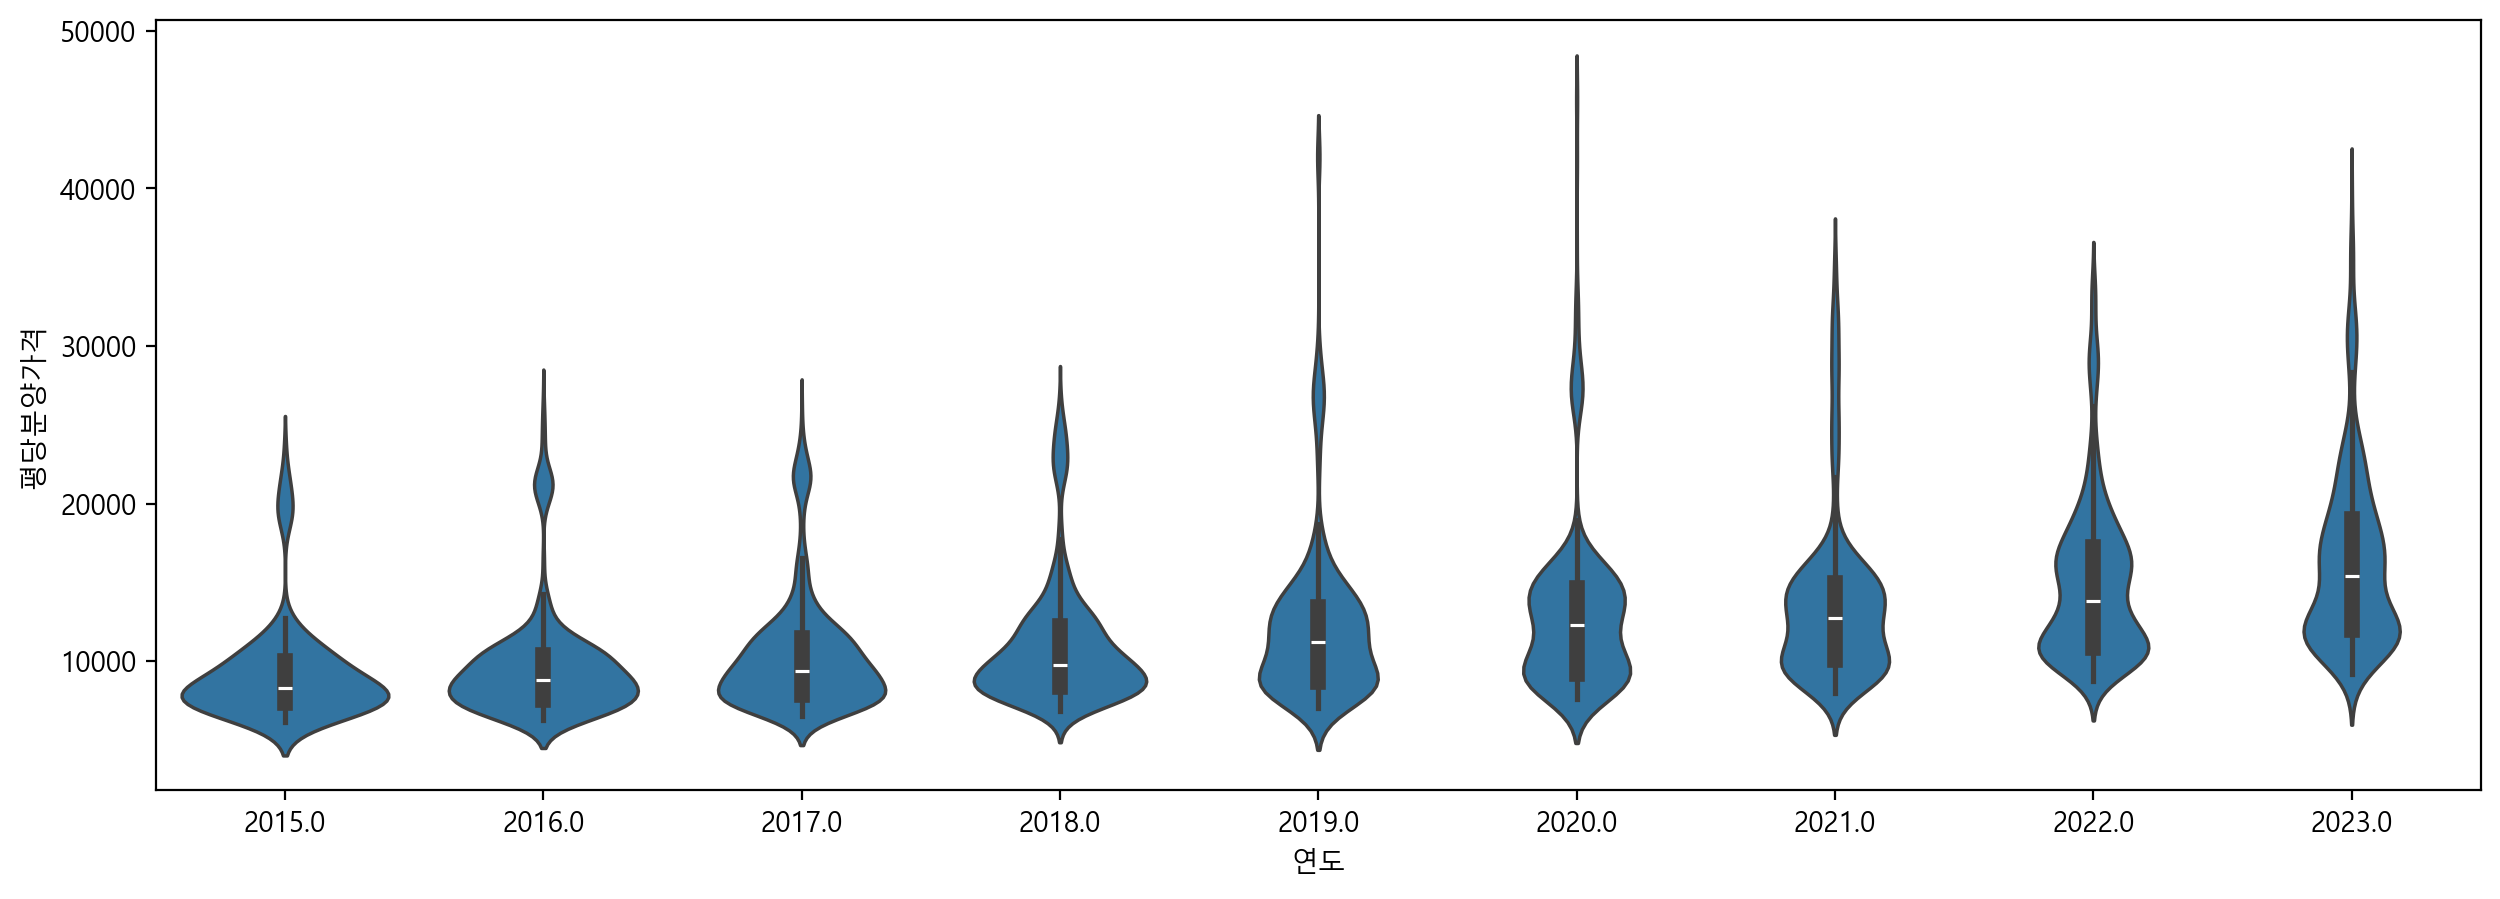

In [188]:
# 연도별 평당분양가격의 사분위수와 분포
plt.figure(figsize=(15,5))
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

<Axes: xlabel='연도', ylabel='평당분양가격'>

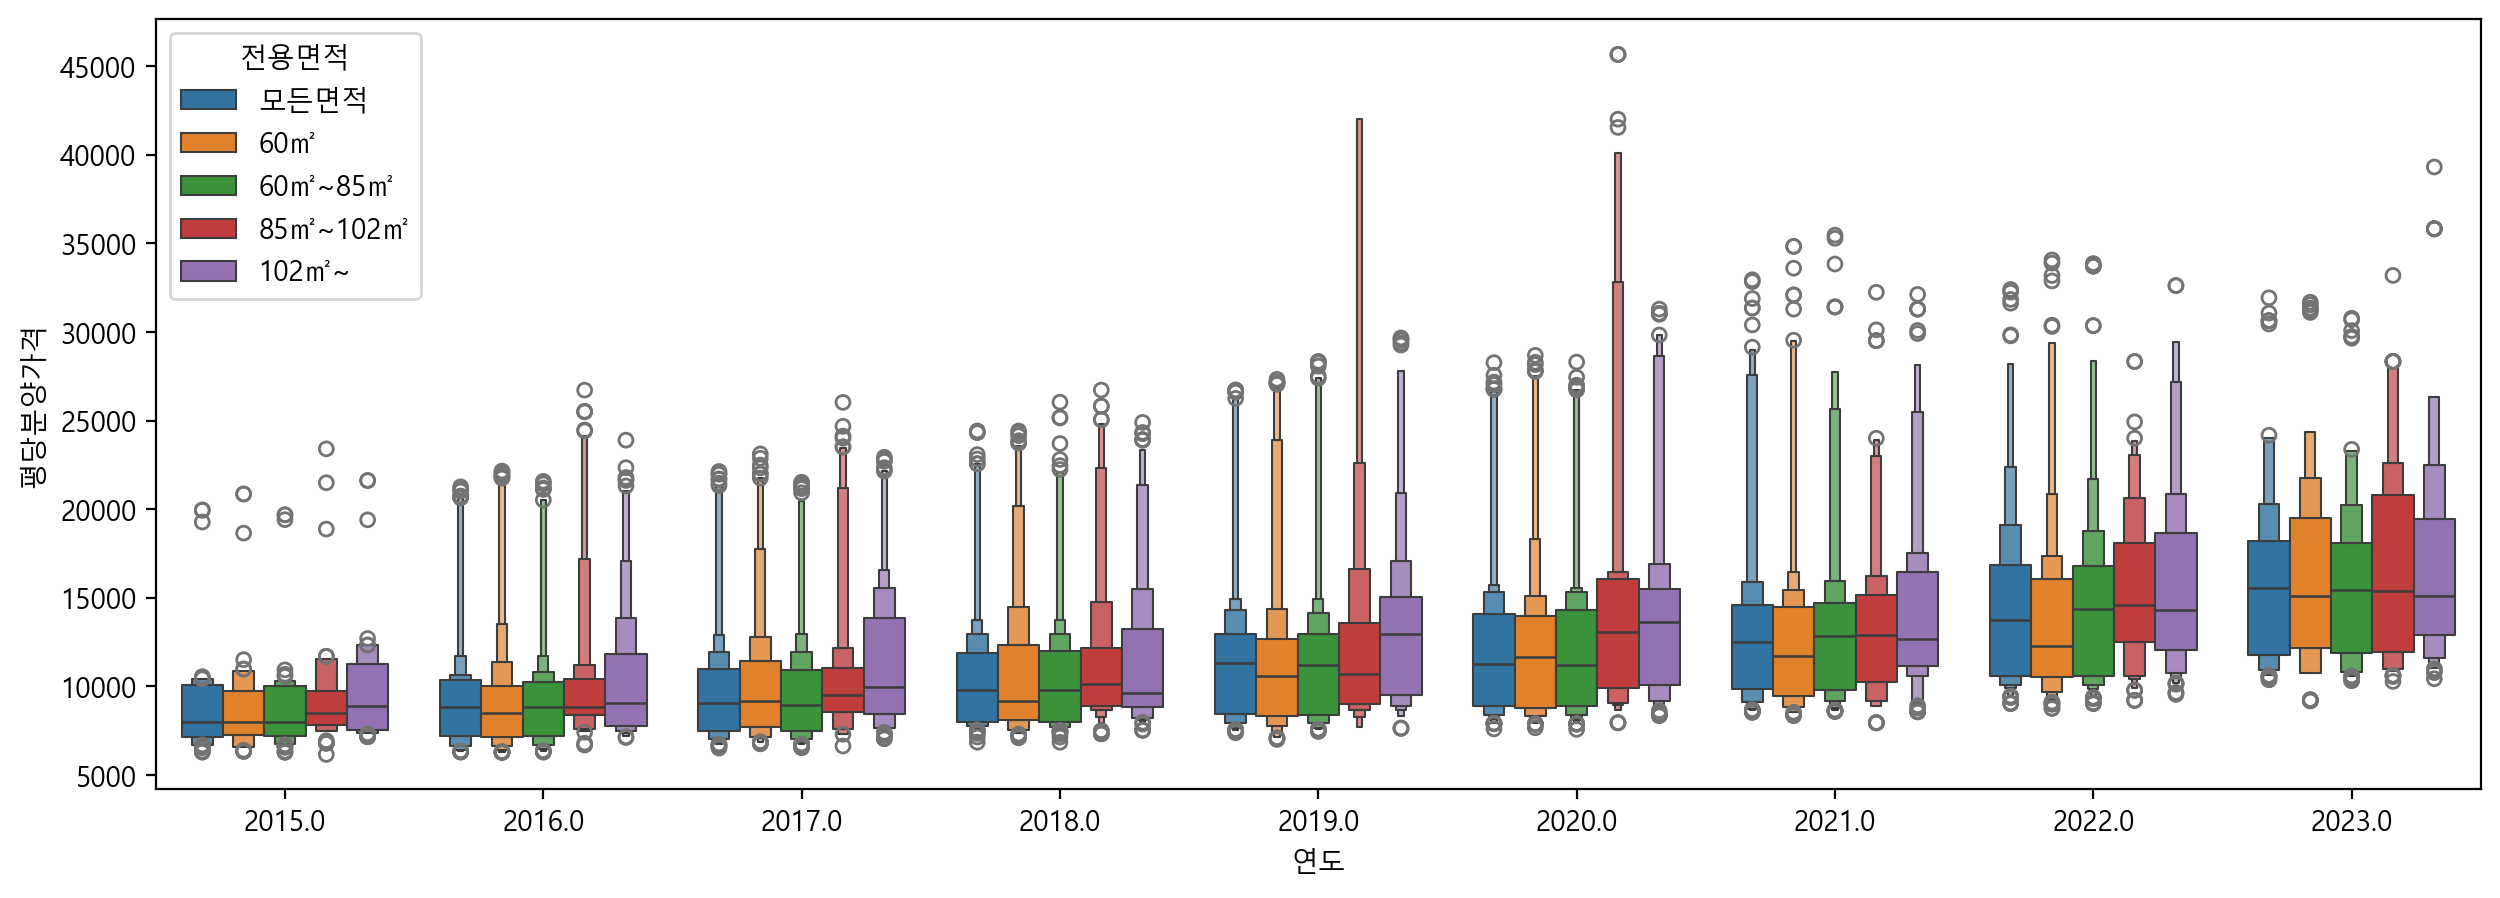

In [194]:
# 연도별 전용면적별 boxenplot
plt.figure(figsize=(15,5))
sns.boxenplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<Axes: xlabel='지역명', ylabel='평당분양가격'>

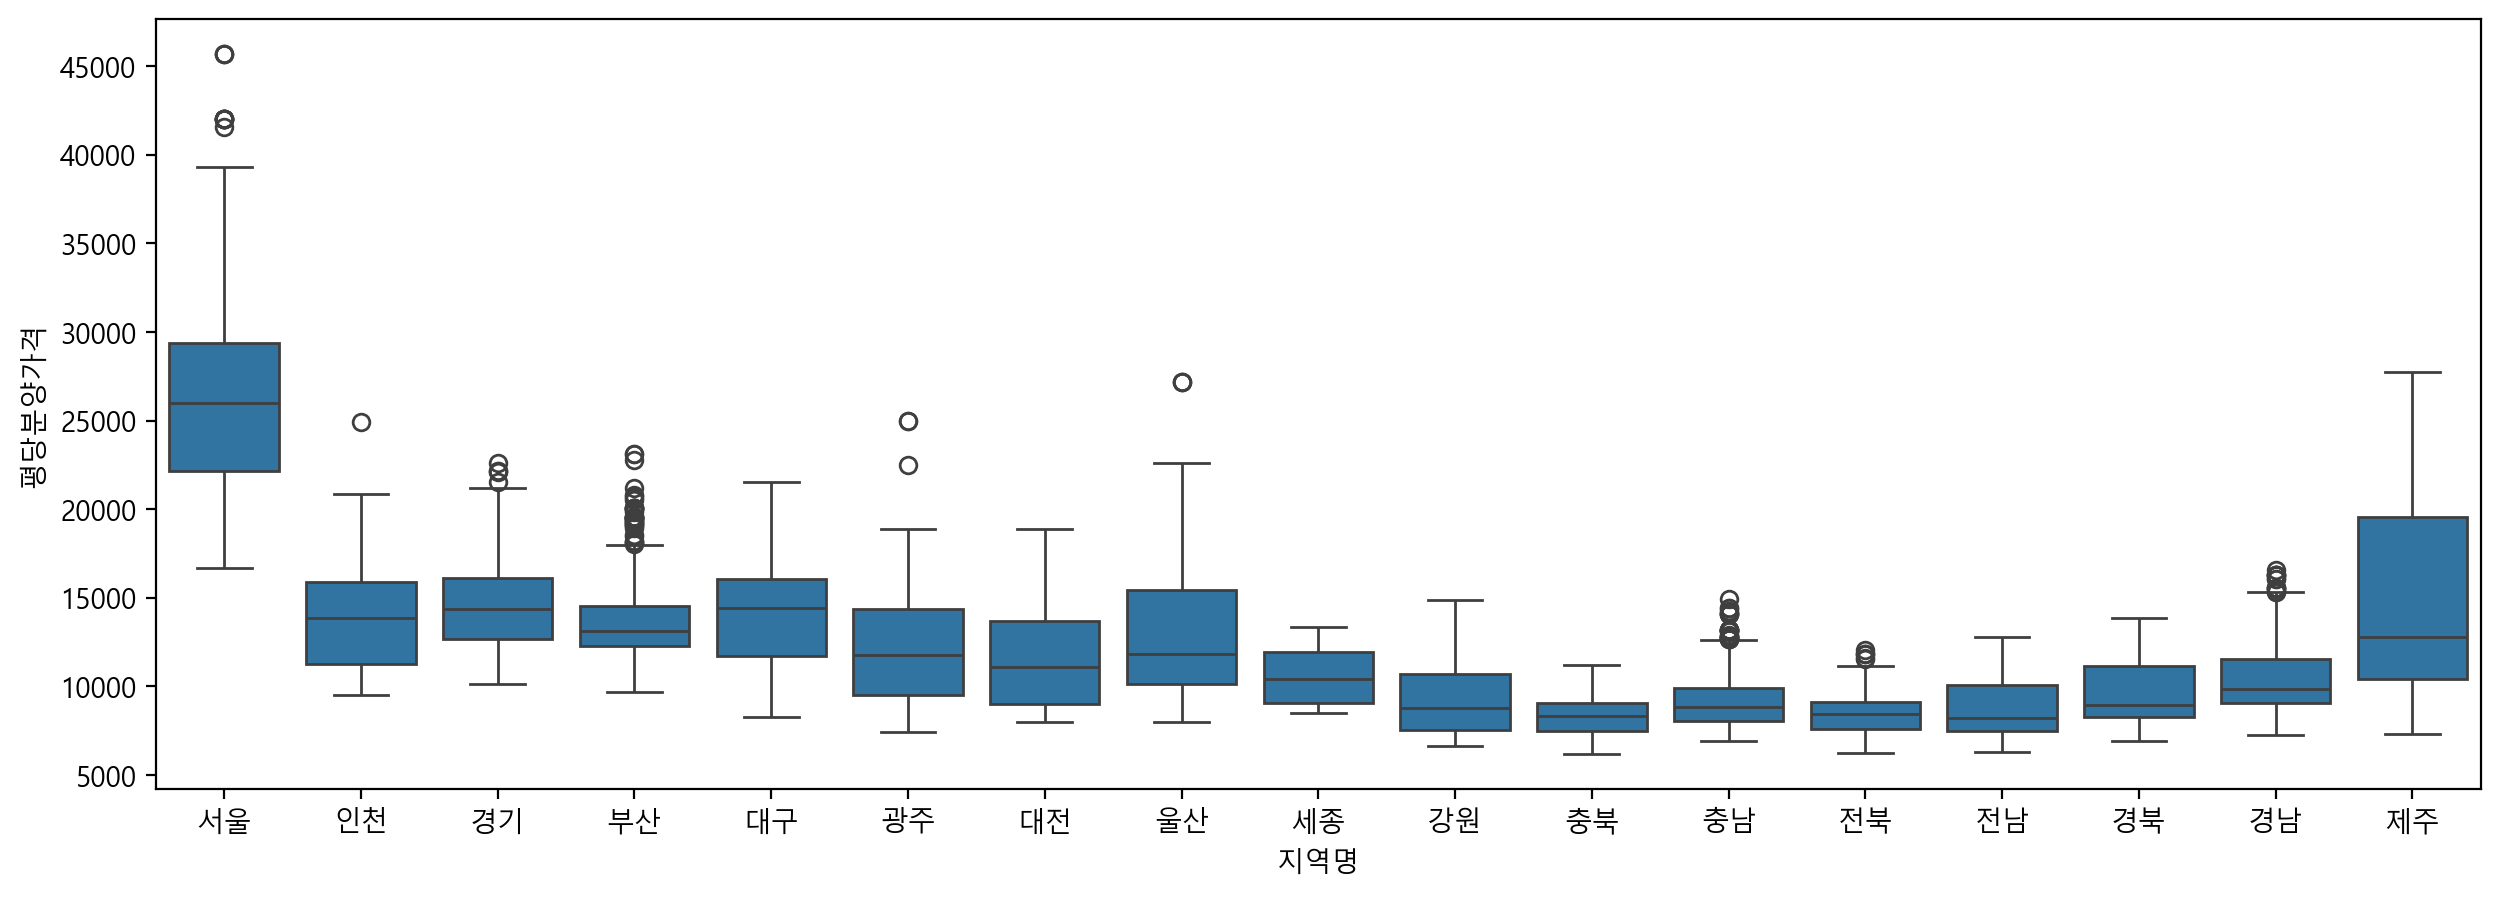

In [195]:
# boxplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,5))
sns.boxplot(data=df_last, x="지역명", y="평당분양가격")

# 10.	구조가 다른 df_first와 df_last의 전용면적 전체의 데이터를 하나의 같은 데이터 셋으로 합쳐서 분석을 한다. 분석은 위의 내용을 참조하여 각자 분석한다(전용면적별 분석 불가)

In [196]:
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [197]:
df_last.sample()

,지역명,연도,월,전용면적,평당분양가격
5386,대전,2021.0,1.0,60㎡,10101.3


**<font color = 'blue'>⁕ df_first와 df_last 다른 필드 가지고 있지만 melt시켜서 행 병합</font>**<br>
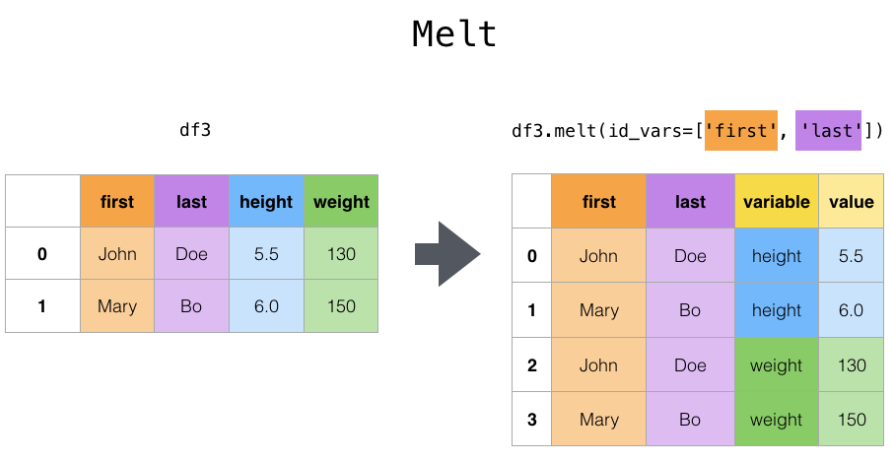

- melt 도움말
    - https://pandas.pydata.org/docs/user_guide/reshaping.html
- tidy data
    - https://vita.had.co.nz/papers/tidy-data.pdf

In [198]:
new_first = df_first.melt(id_vars="지역", 
                          var_name="연도월", 
                          value_name="평당분양가격")
new_first.head()
# melt를 통해 녹인 연도월 데이터는 전처리하기 편하게 데이터로 옴

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [199]:
def parse_year(x):
    return int(x.split("년")[0])
parse_year("2013년12월")

2013

In [203]:
data = '2013년12월'
int(data.split('년')[0])

2013

In [206]:
data = '2013년12월'
#data.split('년')[1] # >> '12월'
int(data.split('년')[1].replace("월", ""))

12

In [200]:
def parse_month(x):
    return int(x.split("년")[-1].replace("월",""))
parse_month("2013년12월")

12

In [211]:
# "연도월" 컬럼을 "연도"컬럼과 "월"컬럼으로 분리한다(lambda함수 이용)
# new_first["연도월"] # >> 나열이 가능한 1차원 리스트 같은 형태
# new_first["연도월"].map(lambda x : int(x.split("년")[0])) # >> 연도만 뺀 형태
new_first['연도'] = new_first["연도월"].map(lambda x : int(x.split("년")[0]))
new_first['월'] = new_first["연도월"].map(lambda x : int(x.split("년")[-1].replace("월","")))
new_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [213]:
# "연도월" 컬럼을 제거하고, 컬럼명을 ["지역명","평당분양가격","연도","월"]로 수정
new_first.drop("연도월", axis=1, inplace=True) # drop은 한번만 실행해야 됨
new_first.columns = ["지역명","평당분양가격","연도","월"]
new_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [217]:
df_last.head(2)

,지역명,연도,월,전용면적,평당분양가격
0,서울,2015.0,10.0,모든면적,19275.3
1,서울,2015.0,10.0,60㎡,18651.6


In [226]:
#df_last 데이터 중 "전용면젹"이 "모든면적"인 데이터만 복사한다(깊은복사) ⇒ df_last[조건]
new_last = df_last[df_last["전용면적"] == "모든면적"].copy()
# "전용면적"컬럼 제거
# new_last.drop("전용면적") # >> 행을 없애는 게 아니기때문에 이렇게만 하면 오류남
# new_last = new_last.drop("전용면적", axis=1) # inplace=True 하기 싫으면 이렇게 작성
new_last.drop("전용면적", axis=1, inplace=True)
new_last.head()

,지역명,연도,월,평당분양가격
0,서울,2015.0,10.0,19275.3
5,인천,2015.0,10.0,10437.9
10,경기,2015.0,10.0,10355.4
15,부산,2015.0,10.0,10269.6
20,대구,2015.0,10.0,8850.6


In [227]:
# new_first와 new_last 행병합
df = pd.concat([new_first, new_last]) # 행 병합은 axis=0 / 열 병합은 axis=1
df.sample()

,지역명,평당분양가격,연도,월
7425,대전,15440.7,2023.0,1.0


In [228]:
df.shape

(1923, 4)

In [229]:
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       7855, 7860, 7865, 7870, 7875, 7880, 7885, 7890, 7895, 7900],
      dtype='int64', length=1923)

In [230]:
# index 재조정
df.index = range(df.shape[0])
df.head()

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013.0,12.0
1,부산,8111.0,2013.0,12.0
2,대구,8080.0,2013.0,12.0
3,인천,10204.0,2013.0,12.0
4,광주,6098.0,2013.0,12.0
